# Breast Cancer Classification

Dibuat oleh: Anthony Kevin Oktavius

Library Import

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns
import klib
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor

**Deskripsi Dataset:**

* **Radius:** rata-rata jarak dari tengah ke poin pada perimeter
* **Texture:** standar deviasi dari angka-angka grayscale
* **Perimeter:** keliling dari suatu sel kanker.
* **Area:** area 
* **Smoothness:** variasi lokal pada panjang radius
* **Compactness:** hasil didapatkan dengan menggunakan rumus seperti berikut: keliling ^ 2 / area - 1.0
* **Concavity:** keparahan bentuk cekung
* **Concave points:** jumlah bagian cekung pada garis 
* **Symmetry:** 
* **Fractal dimension:**

Field Initialization

In [2]:
id_number_field = "id_number"
diagnosis_field = "diagnosis"

# Nucleus properties
radius_field = "radius"
texture_field = "texture"
perimeter_field = "perimeter"
area_field = "area"
smoothness_field = "smoothness"
compactness_field = "compactness"
concavity_field = "concavity"
concave_points = "concave points"
symmetry_field = "symmetry"
fractal_dimension_field = "fractal dimension"

# Statistics Types
mean_field = "mean"
standard_error_field = "Standard error"
worst_field = "worst"

# PCA Fields
pca_area_field = 'Area'
pca_concave_field = 'Concave'

Inisialisasi nama masing-masing field

In [3]:
dataset_column_names = [id_number_field, diagnosis_field]
nucleus_property_names = [radius_field, texture_field, perimeter_field, 
                          area_field, smoothness_field, compactness_field,
                          concavity_field, concave_points, symmetry_field,
                          fractal_dimension_field]

statistics_types = [mean_field, standard_error_field, worst_field]

statistics_type = []

for nucleus_index, statistics_type in enumerate(statistics_types):
    for nucleus_property_index, nucleus_property in enumerate(nucleus_property_names):
        dataset_column_names.append(f"{nucleus_property}_{statistics_type}")

print(dataset_column_names)

['id_number', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal dimension_mean', 'radius_Standard error', 'texture_Standard error', 'perimeter_Standard error', 'area_Standard error', 'smoothness_Standard error', 'compactness_Standard error', 'concavity_Standard error', 'concave points_Standard error', 'symmetry_Standard error', 'fractal dimension_Standard error', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal dimension_worst']


Dataset Preview

In [4]:
dataset_name = "breast_cancer.data"
    
breast_cancer_df = pd.read_csv(dataset_name, sep = ',', names = dataset_column_names)
breast_cancer_df

id_number diagnosis  radius_mean  texture_mean  perimeter_mean  \
0       842302         M        17.99         10.38          122.80   
1       842517         M        20.57         17.77          132.90   
2     84300903         M        19.69         21.25          130.00   
3     84348301         M        11.42         20.38           77.58   
4     84358402         M        20.29         14.34          135.10   
..         ...       ...          ...           ...             ...   
564     926424         M        21.56         22.39          142.00   
565     926682         M        20.13         28.25          131.20   
566     926954         M        16.60         28.08          108.30   
567     927241         M        20.60         29.33          140.10   
568      92751         B         7.76         24.54           47.92   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0       1001.0          0.11840           0.27760         0.30010   
1       1326.0          0.08474           0.07864         0.08690   
2       1203.0          0.10960           0.15990         0.19740   
3        386.1          0.14250           0.28390         0.24140   
4       1297.0          0.10030           0.13280         0.19800   
..         ...              ...               ...             ...   
564     1479.0          0.11100           0.11590         0.24390   
565     1261.0          0.09780           0.10340         0.14400   
566      858.1          0.08455           0.10230         0.09251   
567     1265.0          0.11780           0.27700         0.35140   
568      181.0          0.05263           0.04362         0.00000   

     concave points_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                0.14710  ...        25.380          17.33           184.60   
1                0.07017  ...        24.990          23.41           158.80   
2                0.12790  ...        23.570          25.53           152.50   
3                0.10520  ...        14.910          26.50            98.87   
4                0.10430  ...        22.540          16.67           152.20   
..                   ...  ...           ...            ...              ...   
564              0.13890  ...        25.450          26.40           166.10   
565              0.09791  ...        23.690          38.25           155.00   
566              0.05302  ...        18.980          34.12           126.70   
567              0.15200  ...        25.740          39.42           184.60   
568              0.00000  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564           

Melakukan order pada data berdasarkan ID.

In [5]:
breast_cancer_df.sort_values(by = id_number_field)

id_number diagnosis  radius_mean  texture_mean  perimeter_mean  \
131       8670         M        15.46         19.48          101.70   
287       8913         B        12.89         13.12           81.89   
291       8915         B        14.96         19.10           97.03   
403       9047         B        12.94         16.17           83.18   
47       85715         M        13.17         18.66           85.98   
..         ...       ...          ...           ...             ...   
449  911157302         M        21.10         20.52          138.10   
460  911296201         M        17.08         27.15          111.20   
461  911296202         M        27.42         26.27          186.90   
463  911320501         B        11.60         18.36           73.88   
464  911320502         B        13.17         18.22           84.28   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
131      748.9          0.10920           0.12230         0.14660   
287      515.9          0.06955           0.03729         0.02260   
291      687.3          0.08992           0.09823         0.05940   
403      507.6          0.09879           0.08836         0.03296   
47       534.6          0.11580           0.12310         0.12260   
..         ...              ...               ...             ...   
449     1384.0          0.09684           0.11750         0.15720   
460      930.9          0.09898           0.11100         0.10070   
461     2501.0          0.10840           0.19880         0.36350   
463      412.7          0.08508           0.05855         0.03367   
464      537.3          0.07466           0.05994         0.04859   

     concave points_mean  ...  radius_worst  texture_worst  perimeter_worst  \
131              0.08087  ...         19.26          26.00           124.90   
287              0.01171  ...         13.62          15.54            87.40   
291              0.04819  ...         16.25          26.19           109.10   
403              0.02390  ...         13.86          23.02            89.69   
47               0.07340  ...         15.67          27.95           102.80   
..                   ...  ...           ...            ...              ...   
449              0.11550  ...         25.68          32.07           168.20   
460              0.06431  ...         22.96          34.49           152.10   
461              0.16890  ...         36.04          31.37           251.20   
463              0.01777  ...         12.77          24.02            82.68   
464              0.02870  ...         14.90          23.89            95.10   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
131      1156.0           0.15460             0.2394           0.3791   
287       577.0           0.09616             0.1147           0.1186   
291       809.8           0.13130             0.3030           0.1804   
403       580.9           0.11720             0.1958           0.1810   
47        759.4           0.17860             0.4166           0.5006   
..          ...               ...                ...              ...   
449      2022.0           0.13680             0.3101           0.4399   
460      1648.0           0.16000             0.2444           0.2639   
461      4254.0           0.13570             0.4256           0.6833   
463       495.1           0.13420             0.1808           0.1860   
464       687.6           0.12820             0.1965           0.1876   

     concave points_worst  symmetry_worst  fractal dimension_worst  
131               0.15140          0.2837                  0.08019  
287               0.05366          0.2309                  0.06915  
291               0.14890          0.2962                  0.08472  
403               0.08388          0.3297                  0.07834  
47                0.20880          0.3900                  0.11790  
..                    ...             ...                      ...  
449           

Deskripsi Dataset.

In [6]:
breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id_number                         569 non-null    int64  
 1   diagnosis                         569 non-null    object 
 2   radius_mean                       569 non-null    float64
 3   texture_mean                      569 non-null    float64
 4   perimeter_mean                    569 non-null    float64
 5   area_mean                         569 non-null    float64
 6   smoothness_mean                   569 non-null    float64
 7   compactness_mean                  569 non-null    float64
 8   concavity_mean                    569 non-null    float64
 9   concave points_mean               569 non-null    float64
 10  symmetry_mean                     569 non-null    float64
 11  fractal dimension_mean            569 non-null    float64
 12  radius_S

Melihat Data Statistika

In [7]:
breast_cancer_df.describe()

id_number  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

Melakukan list variabel-variabel yang kategorik ataupun numerik.

In [8]:
categorical_variables = [diagnosis_field]

numerical_variables = breast_cancer_df.columns.to_list()
numerical_variables.remove(id_number_field)
numerical_variables.remove(diagnosis_field)

print(categorical_variables)
print(numerical_variables)

print(len(categorical_variables))
print(len(numerical_variables))

['diagnosis']
['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal dimension_mean', 'radius_Standard error', 'texture_Standard error', 'perimeter_Standard error', 'area_Standard error', 'smoothness_Standard error', 'compactness_Standard error', 'concavity_Standard error', 'concave points_Standard error', 'symmetry_Standard error', 'fractal dimension_Standard error', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal dimension_worst']
1
30


In [9]:
feature_variables = numerical_variables.copy() 
target_variables = diagnosis_field

## Data Visualization

Definisi Fungsi untuk Data Visualisasi

In [10]:
def get_plot_figure(width, height):
    figure = plt.figure()
    figure.set_figwidth(width)
    figure.set_figheight(height)
    return figure

### Single Variable

#### Categorical Variables

Pie Chart - Composition

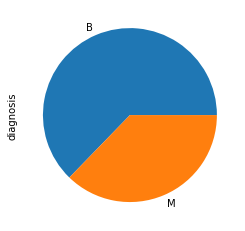

In [11]:
for index, categorical_variable in enumerate(categorical_variables):
    breast_cancer_df[categorical_variable].value_counts().plot(kind = 'pie')

Bar Chart - Comparison

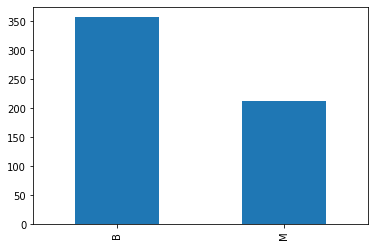

In [12]:
for index, categorical_variable in enumerate(categorical_variables):
    breast_cancer_df[categorical_variable].value_counts().plot(kind = 'bar')

#### Numerical Variables

Distribution Plot - Distribution

Note: The number of non binary numerical features is very large (30), please consider splitting the data. Showing plots for the first 20 numerical features. Override this by setting showall=True.


<AxesSubplot:xlabel='fractal dimension_Standard error', ylabel='Density'>

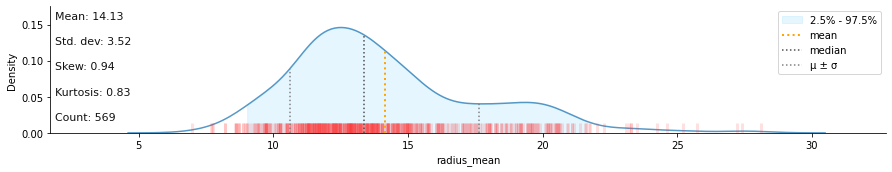

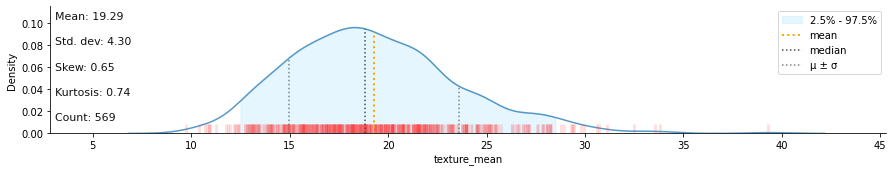

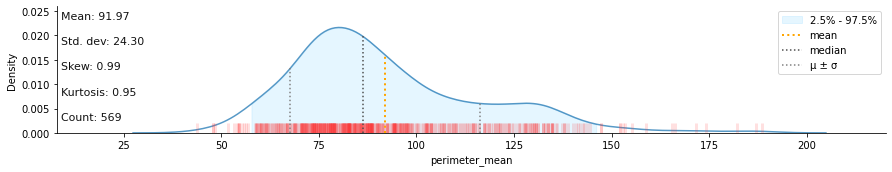

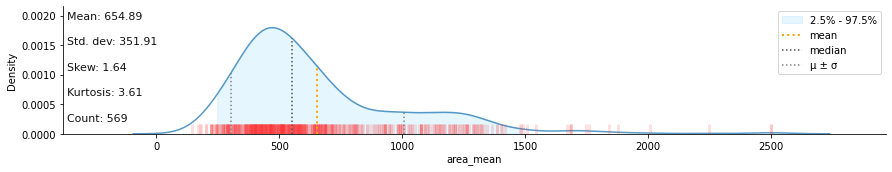

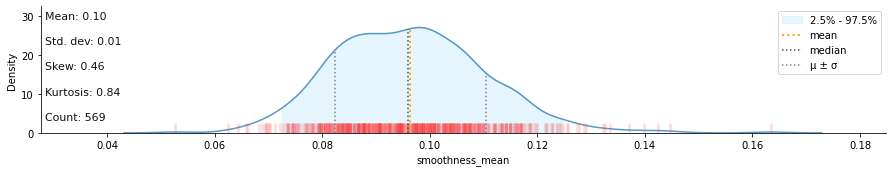

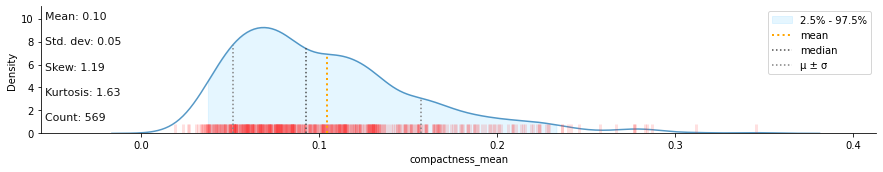

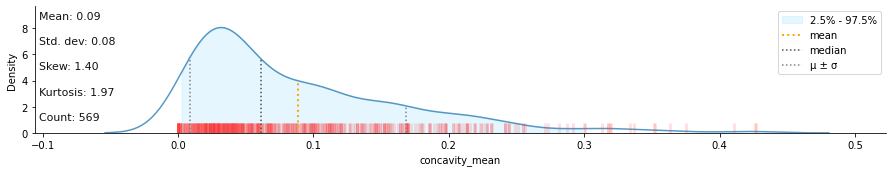

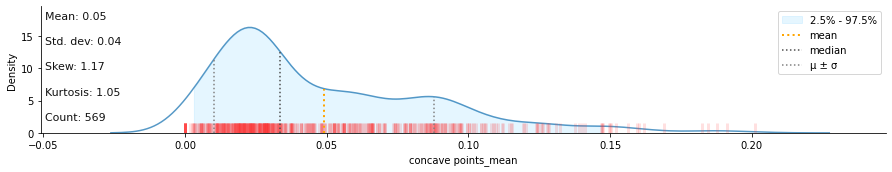

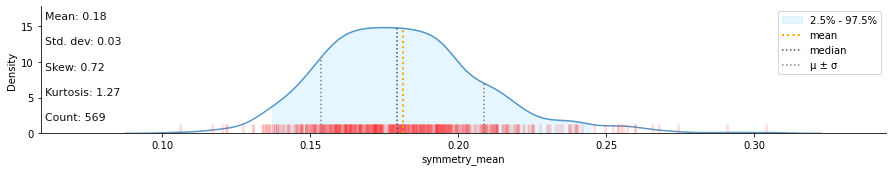

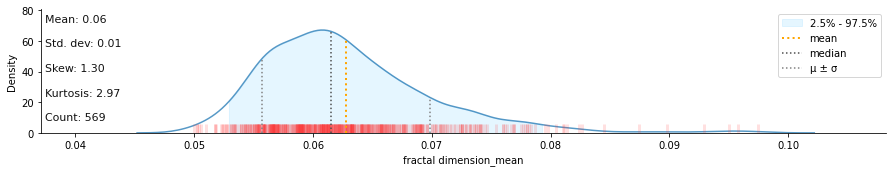

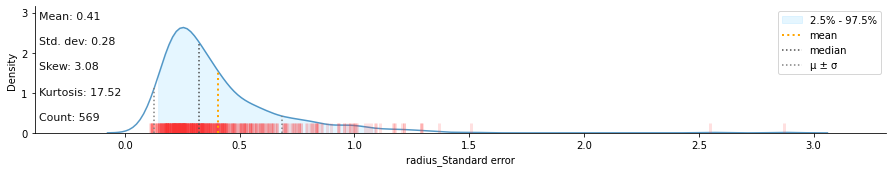

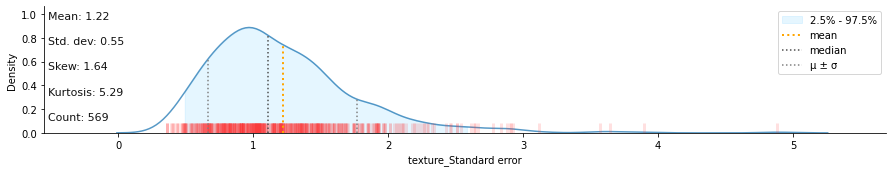

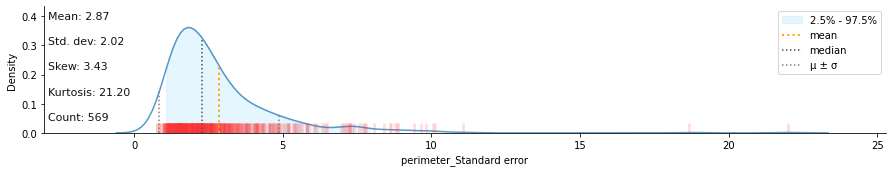

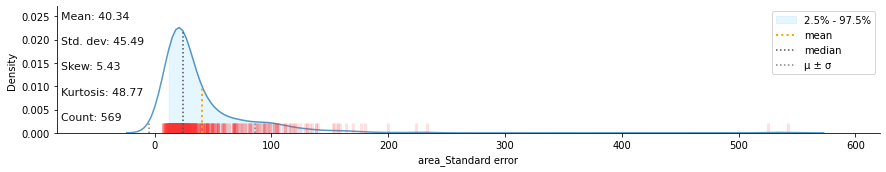

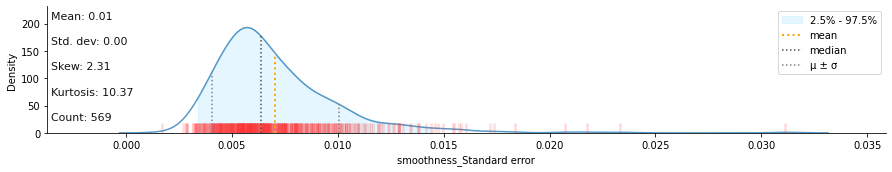

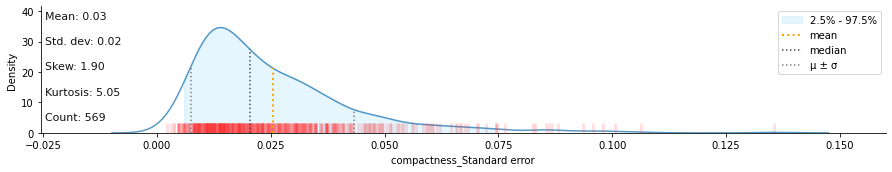

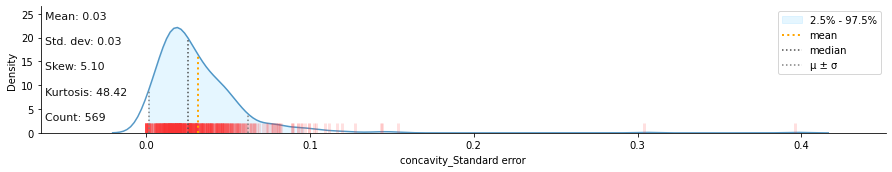

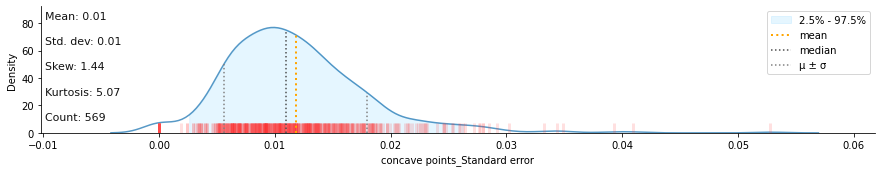

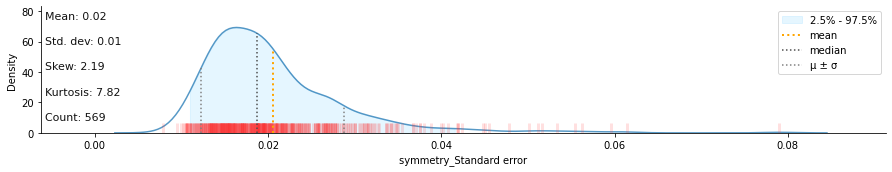

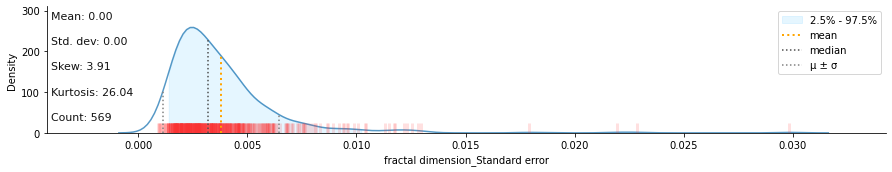

In [13]:
klib.dist_plot(breast_cancer_df[numerical_variables])

Box Plot - Comparison

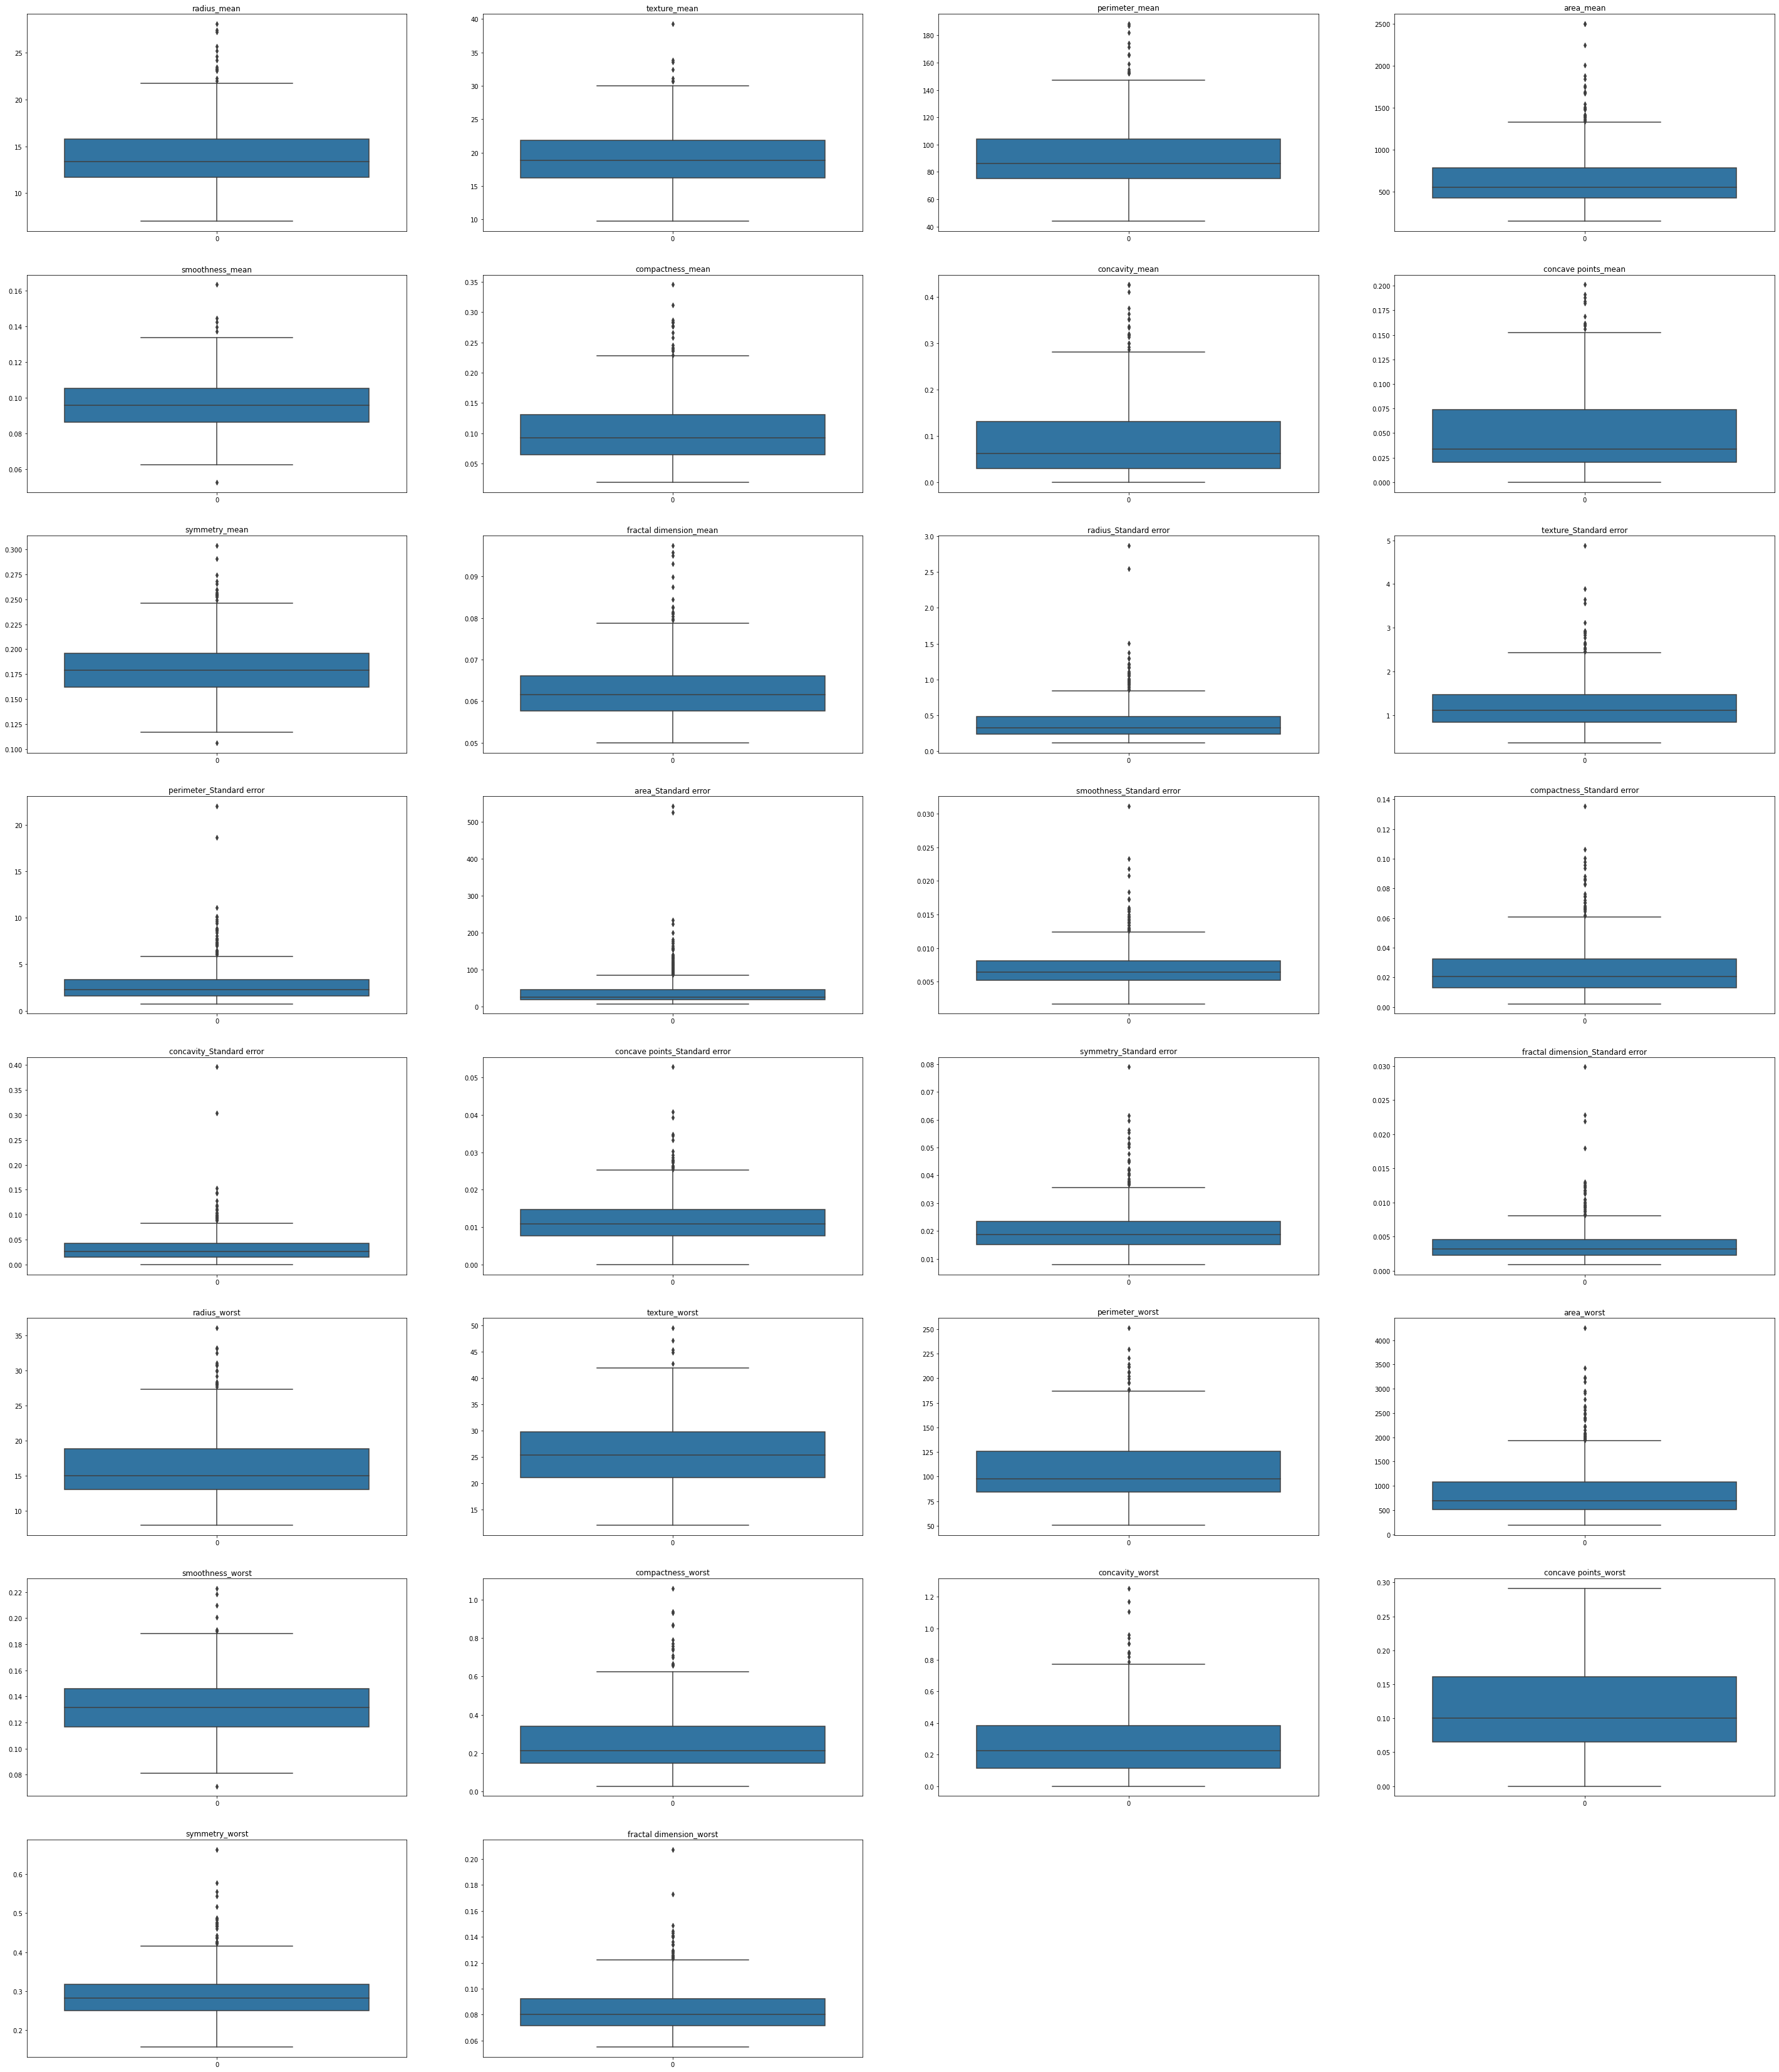

In [14]:
figure = get_plot_figure(50, 60)

for index, numerical_variable in enumerate(numerical_variables):
    plt.subplot(8, 4, index + 1)
    plt.xticks([])
    plt.title(numerical_variable)
    sns.boxplot(data = breast_cancer_df[numerical_variable])
plt.show()

### Two Variables

#### Categorical Variables

Multiple Bar Chart - Comparison

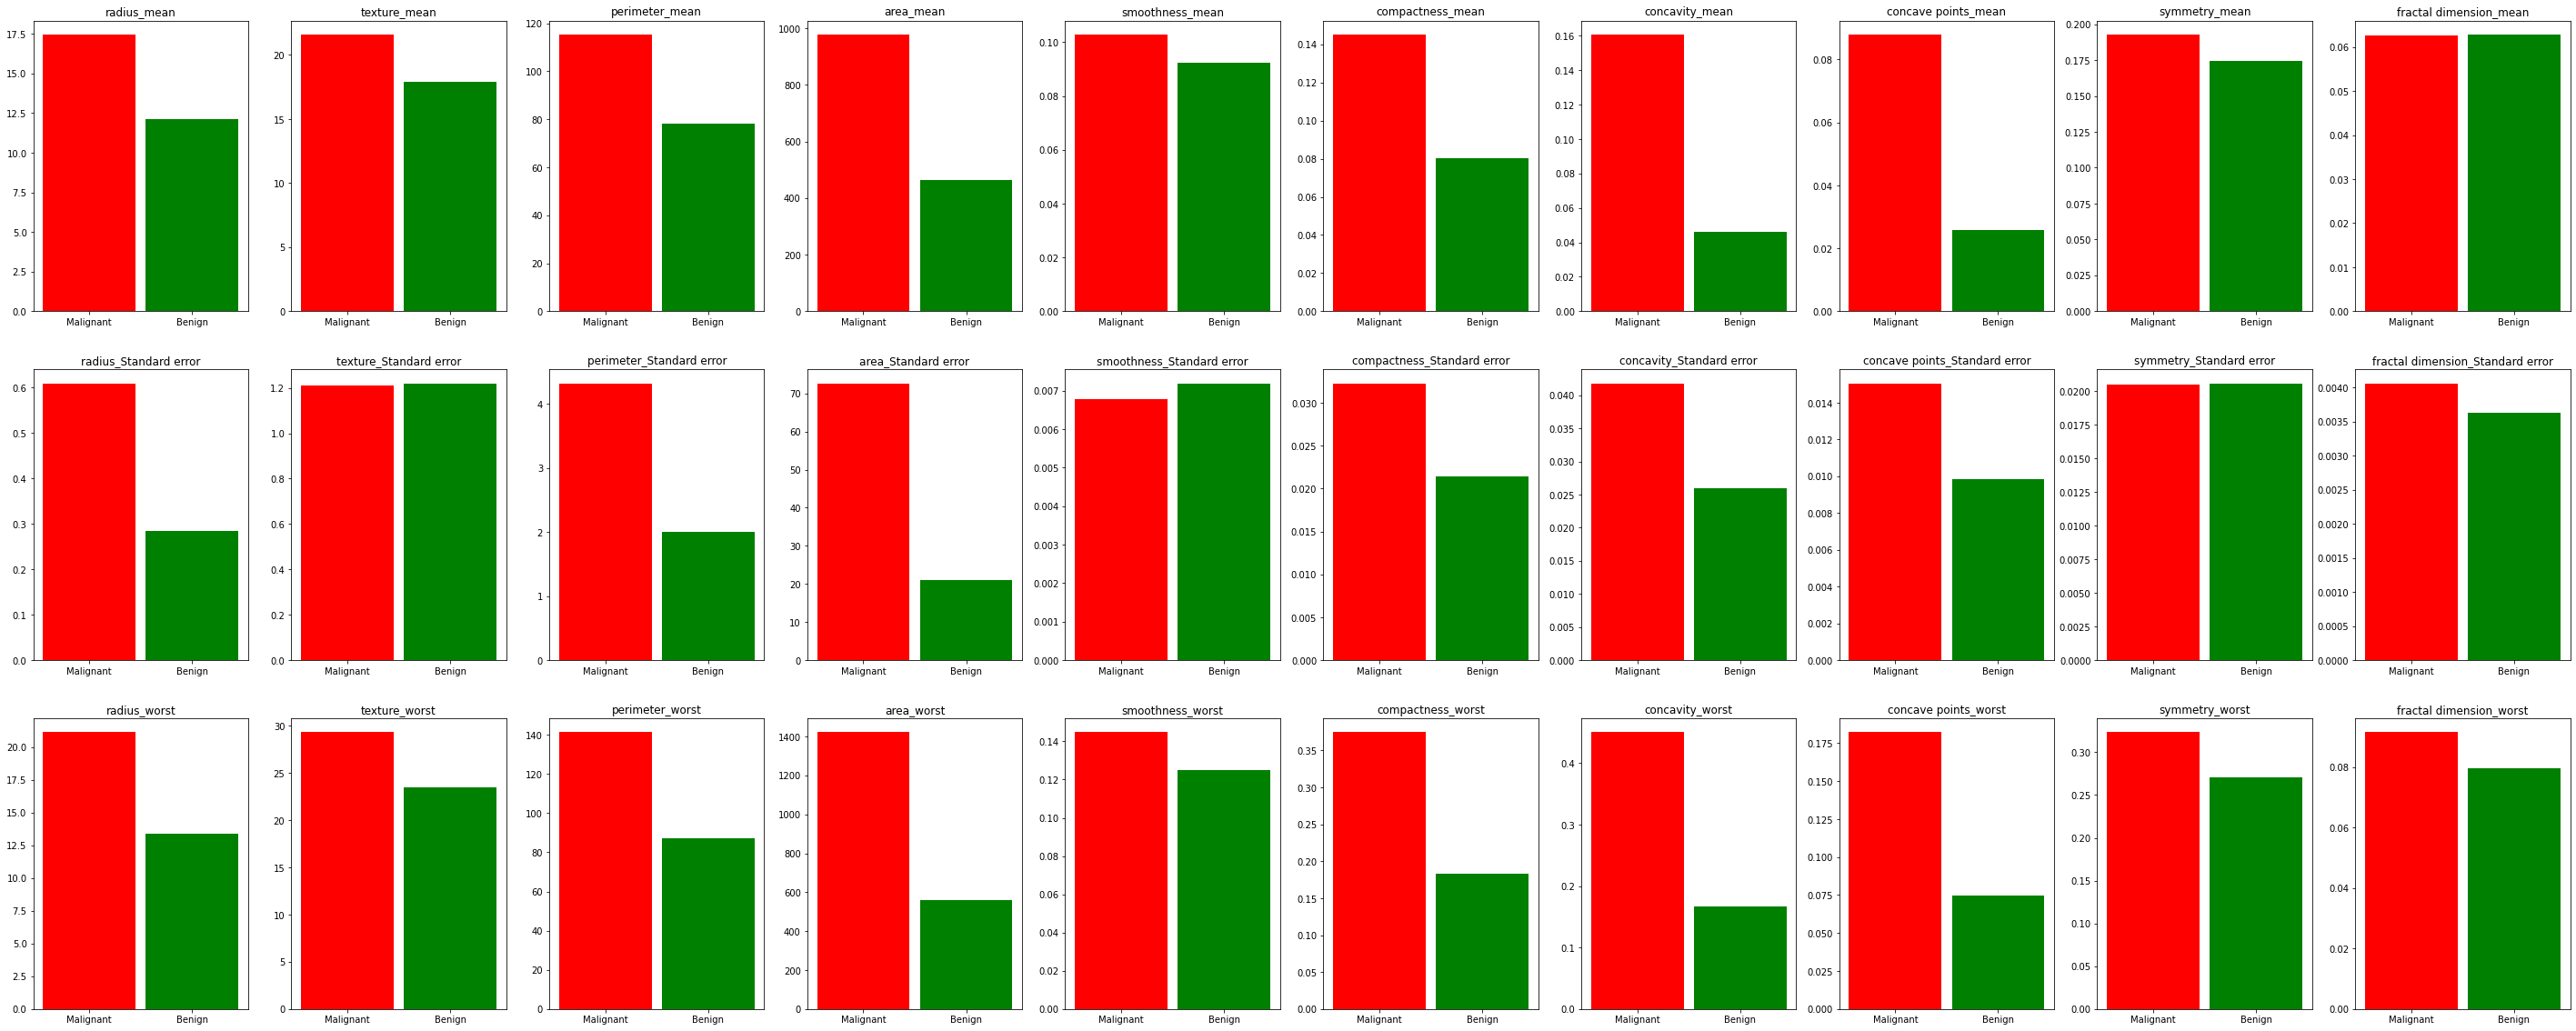

In [15]:
stacked_bar_chart_width = 0.9
survived_0_color = 'red'
survived_1_color = 'green'

figure = get_plot_figure(50, 20)

stacked_bar_fields = numerical_variables.copy()
stacked_bar_fields.append(diagnosis_field)

for index, field in enumerate(stacked_bar_fields):
    
    if field == diagnosis_field:
        continue

    plt.subplot(3, 10, index + 1)

    mean_malignant = breast_cancer_df.loc[breast_cancer_df[diagnosis_field] == 'M'].groupby(diagnosis_field)[field].mean()
    mean_benign = breast_cancer_df.loc[breast_cancer_df[diagnosis_field] == 'B'].groupby(diagnosis_field)[field].mean()

    unique_value_malignant = list(mean_malignant.index)[:5]
    unique_value_benign = list(mean_benign.index)[:5]

    plt.title(field)

    plt.xticks([0, 1], ['Malignant', 'Benign'])

    plt.bar(unique_value_malignant, mean_malignant, color = survived_0_color, width=stacked_bar_chart_width)
    plt.bar(unique_value_benign, mean_benign, color = survived_1_color, width=stacked_bar_chart_width)

plt.show()

#### Numerical Variables

Distribution Plot - Comparison & Distribution

mean


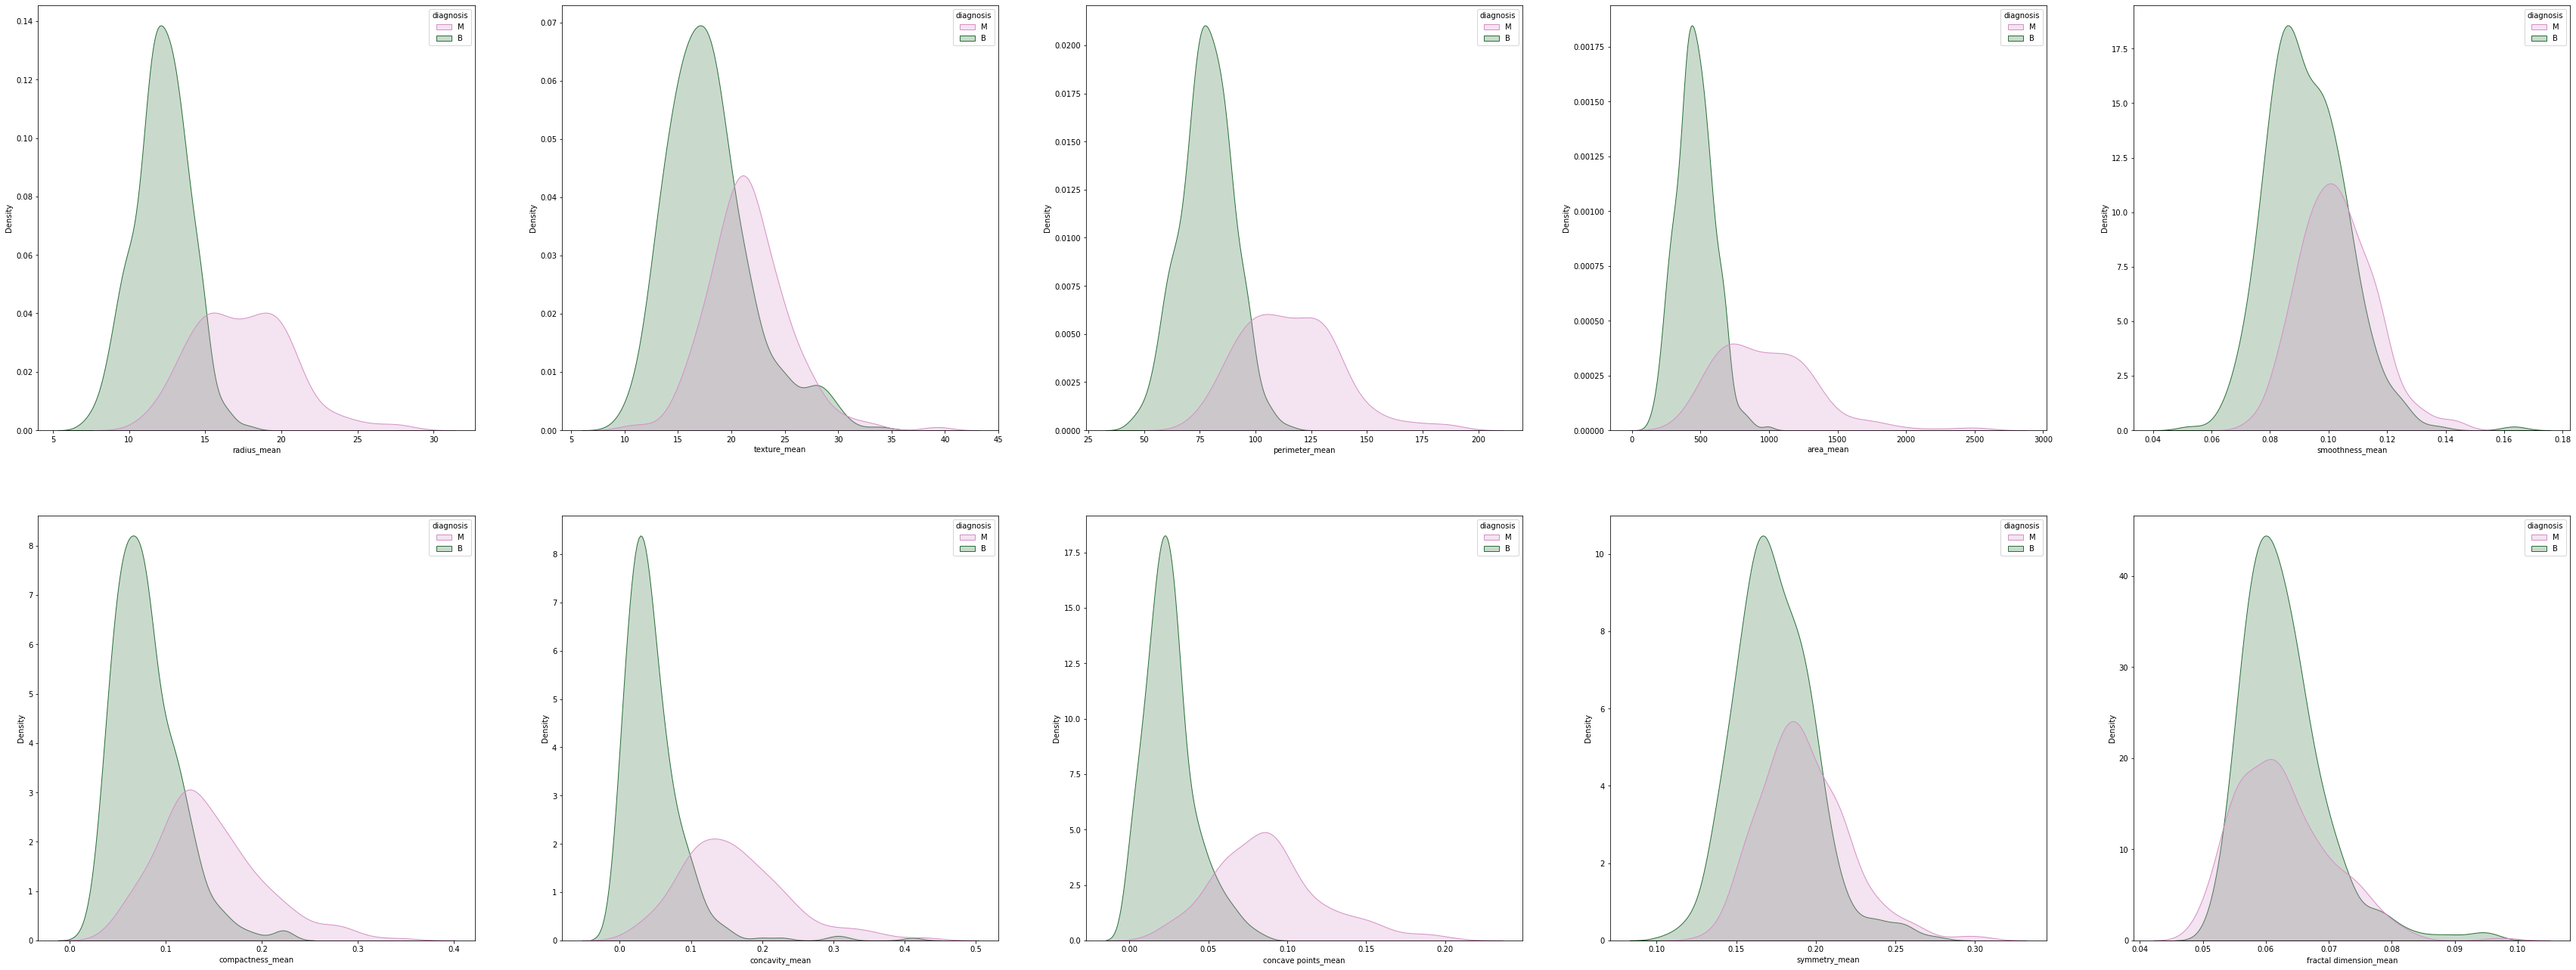

Standard error


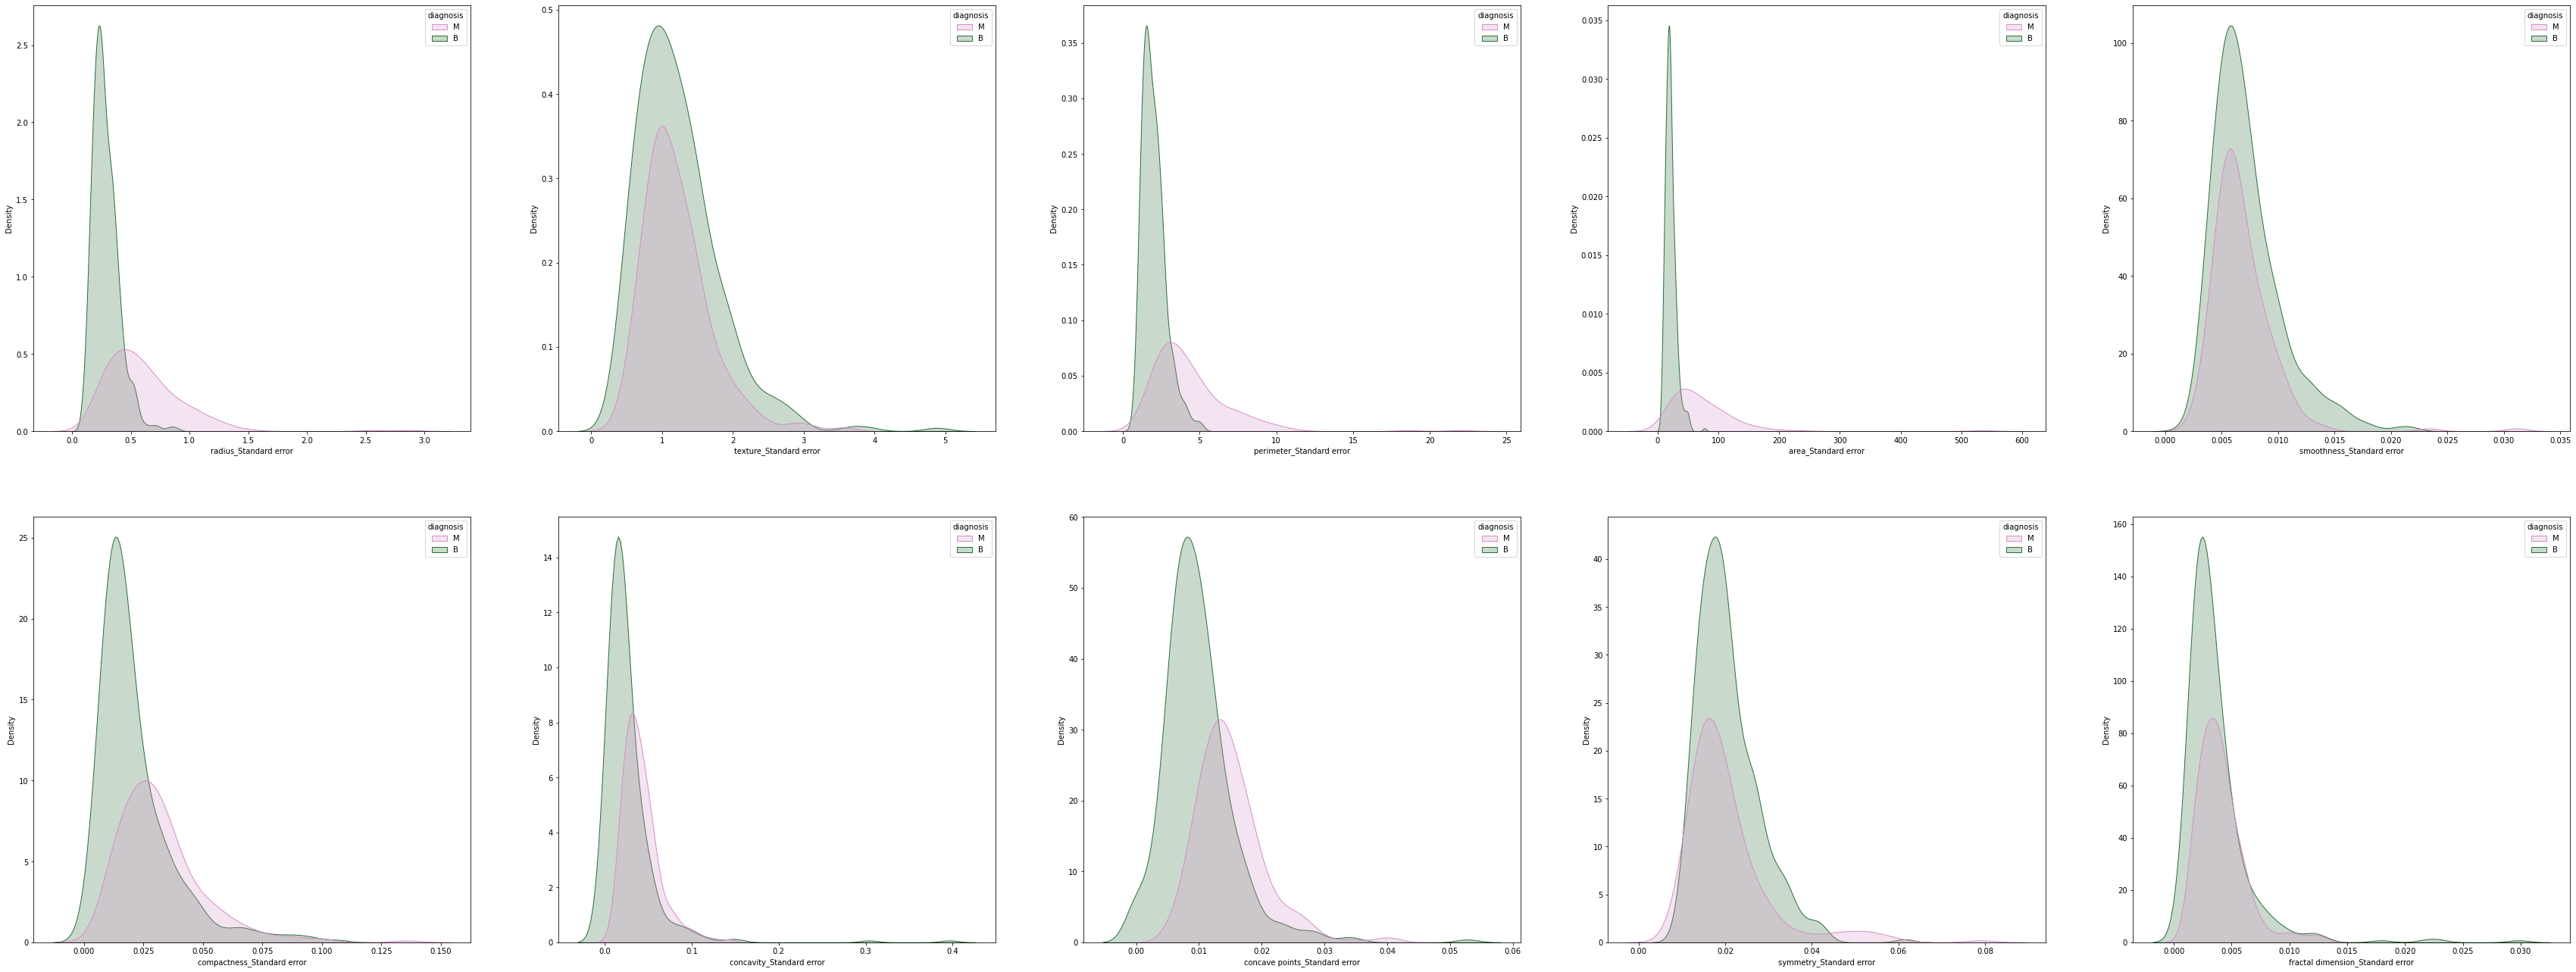

worst


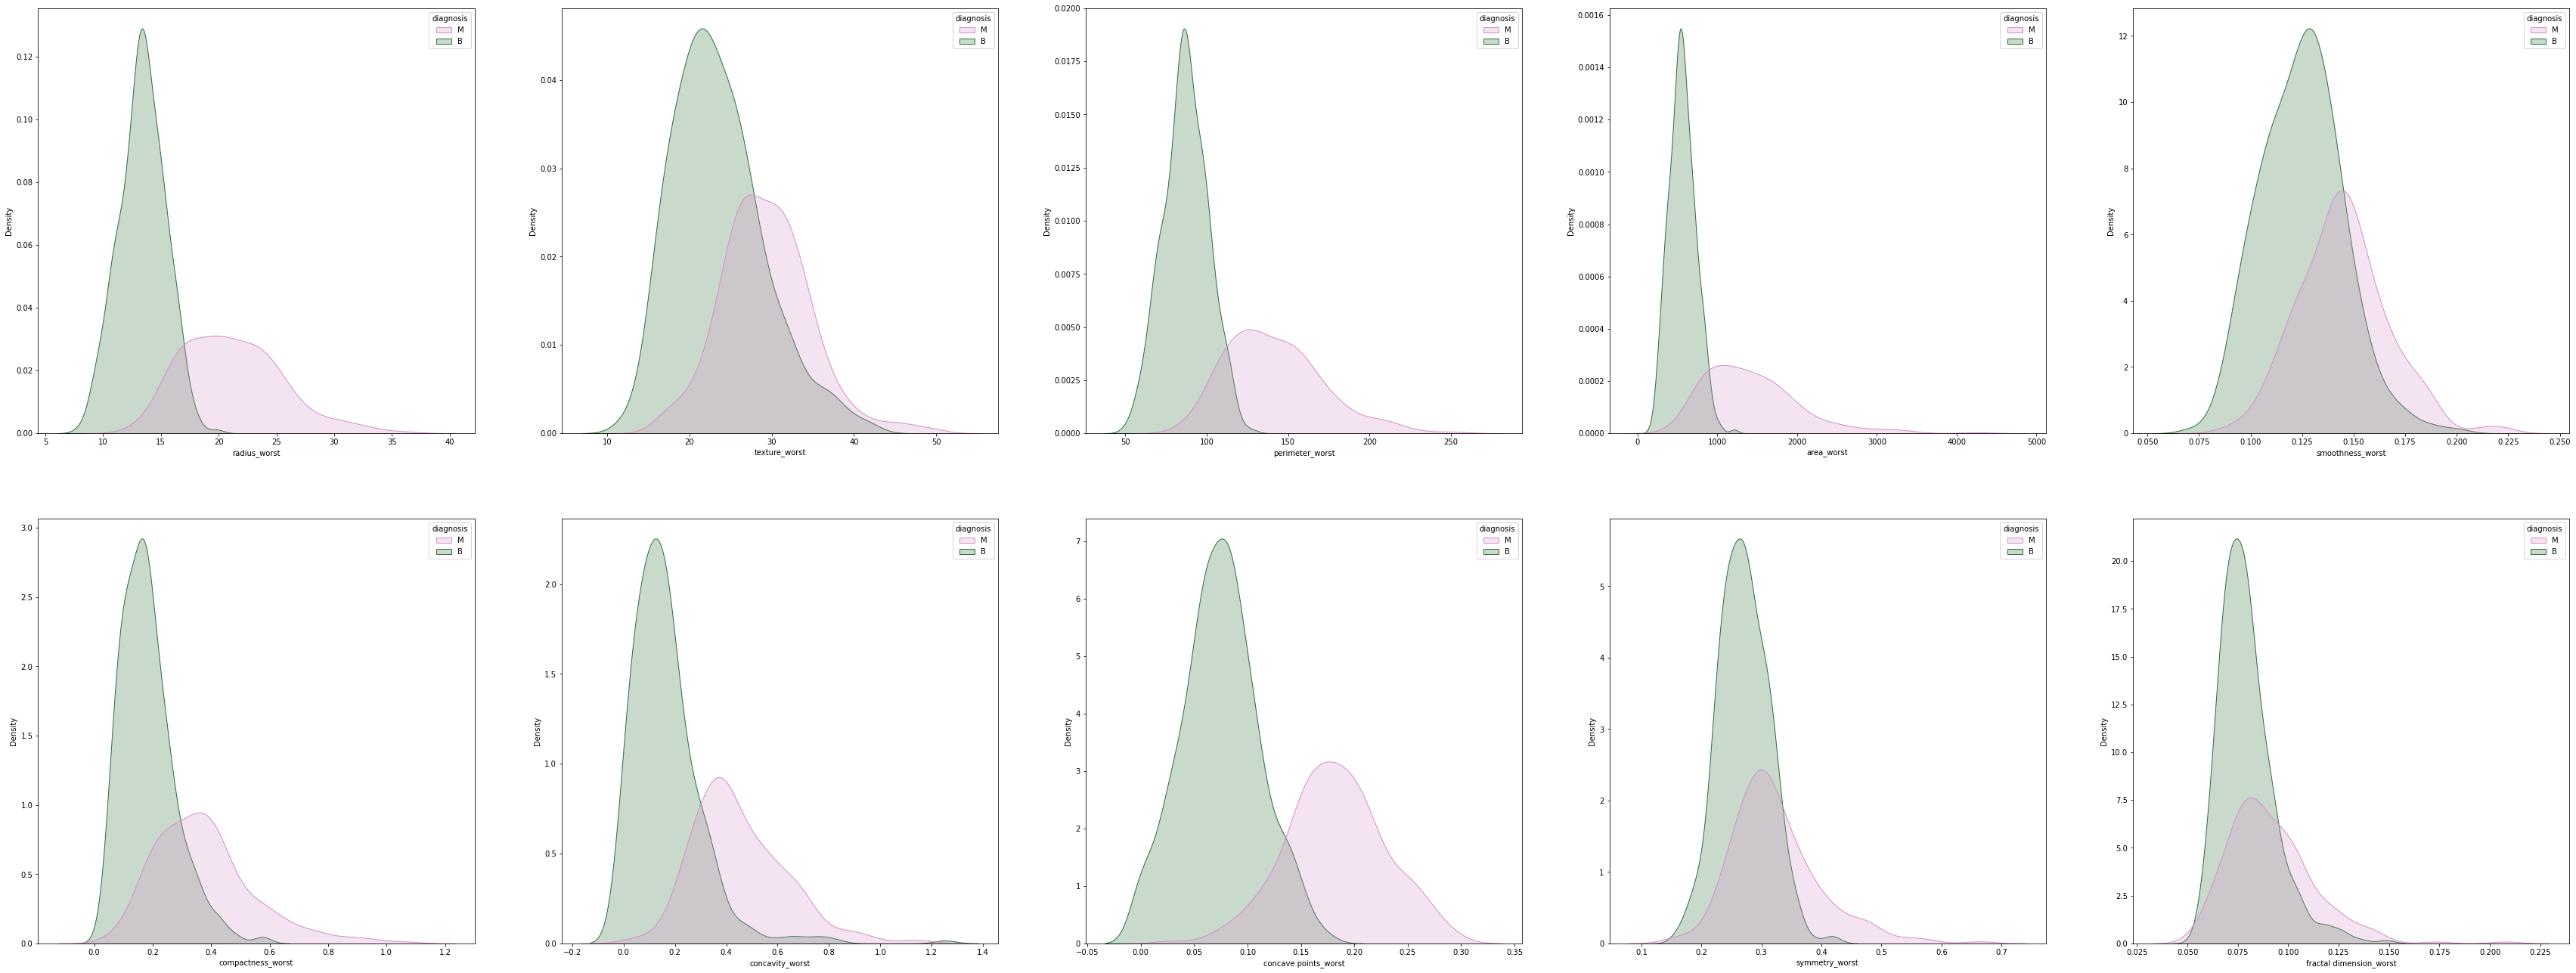

<Figure size 4320x4320 with 0 Axes>

In [16]:
figure = get_plot_figure(60, 60)

statistics_type_index = 0

for index, numerical_field in enumerate(numerical_variables):
    plt.subplot(5, 5, (index % 10) + 1)
    sns.kdeplot(x = breast_cancer_df[numerical_field], 
                hue = breast_cancer_df[diagnosis_field],
                palette='cubehelix_r',
                shade = True)

    if (index + 1) % 10 == 0:
        print(statistics_types[statistics_type_index])
        plt.show()
        figure = get_plot_figure(60, 60)
        statistics_type_index += 1

### Multiple Variables

#### Numerical Variables

Pairplot - Relationship, Distribution & Comparison

Dalam kasus ini, saya akan membandingkan nilai-nilai antar satu statistika yang ada, karena apabila terlalu banyak fitur yang dikomparasikan, gambar akan menjadi sangat kecil. Pada akibatnya, kita akan sulit untuk mendapatkan insight dari gambar pairplot yang diberikan.

Dalam proyek ini, terdapat 2 tipe yang dibandingkan, yaitu sebagai berikut.

* Satu variabel antar variabel lainnya dalam satu statistik yang sama.
* Satu variabel antar variabel yang sama, namun berbeda statistik.

In [17]:
# STATISTIC_INTERVAL = 10

# for index, statistics_type in enumerate(statistics_types):
#     print(statistics_types[index])
#     statistic_columns = numerical_variables[index * STATISTIC_INTERVAL : (index + 1) * STATISTIC_INTERVAL]
#     statistic_columns.append(diagnosis_field)

#     sns.pairplot(data = breast_cancer_df[statistic_columns], hue = diagnosis_field)
#     plt.show()

radius


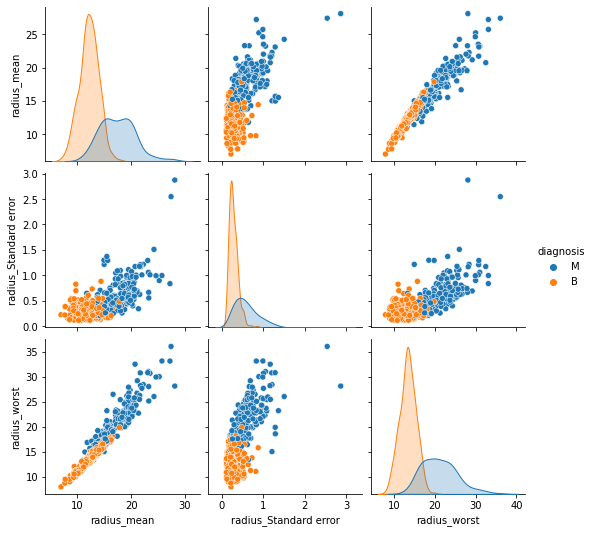

texture


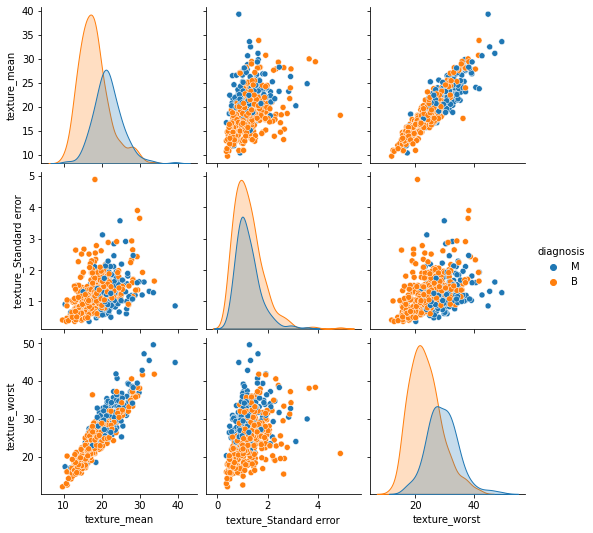

perimeter


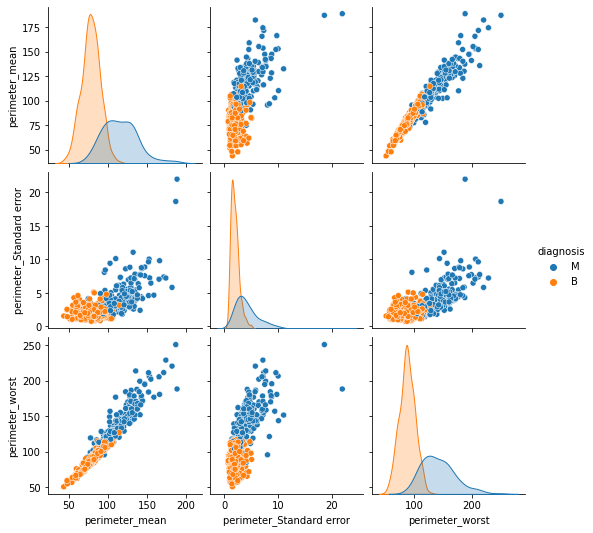

area


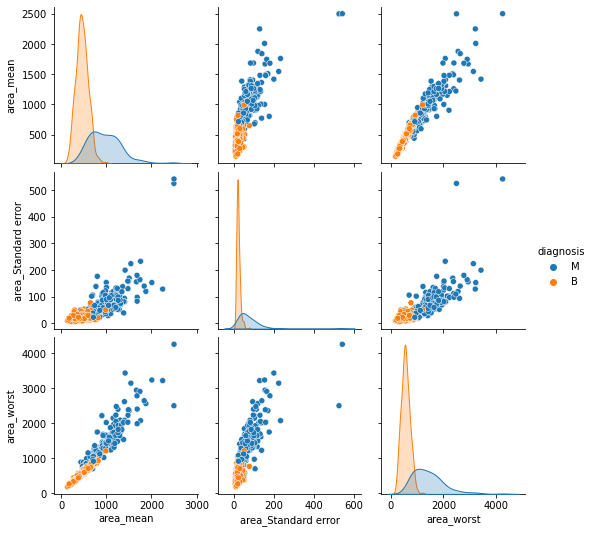

smoothness


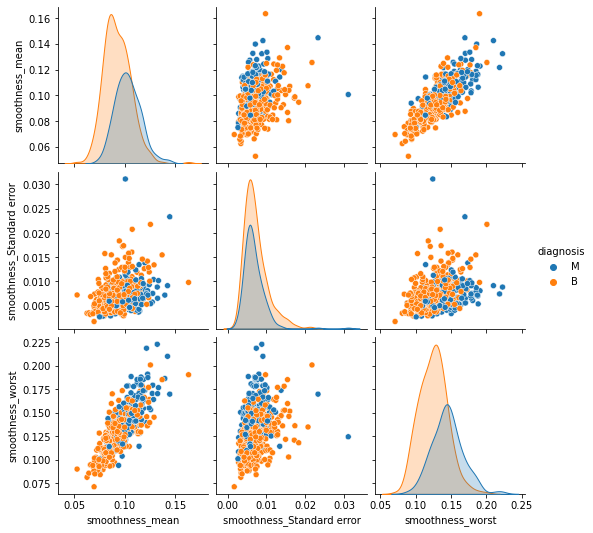

compactness


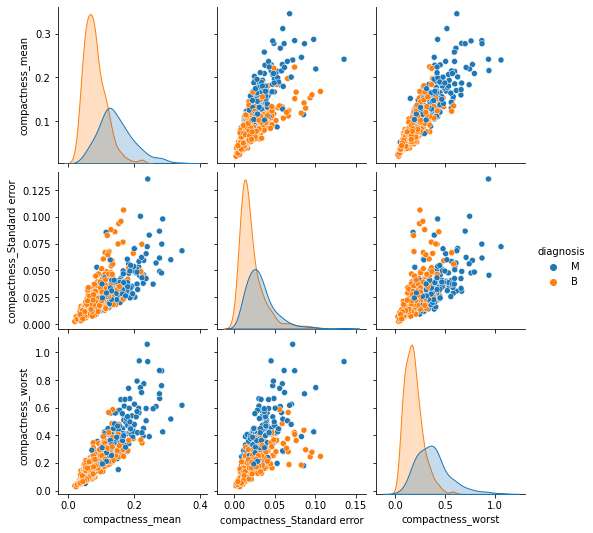

concavity


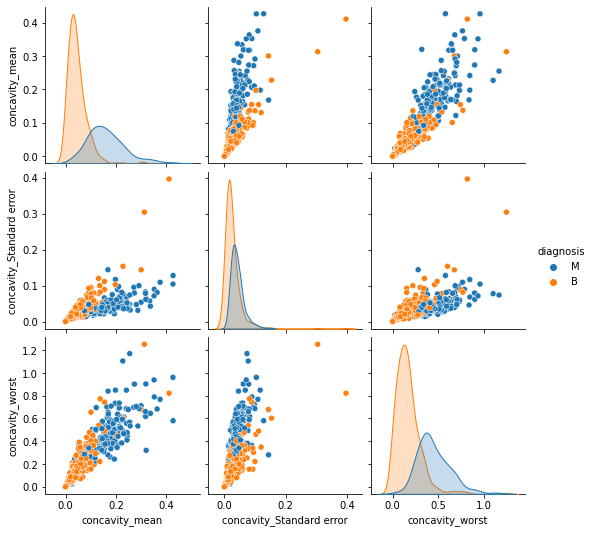

concave points


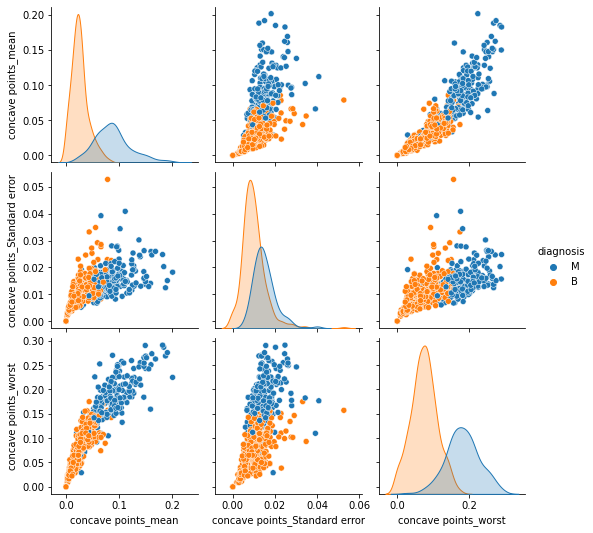

symmetry


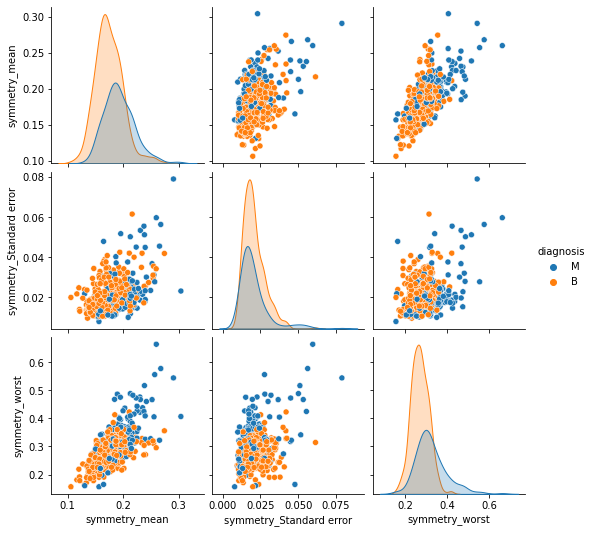

fractal dimension


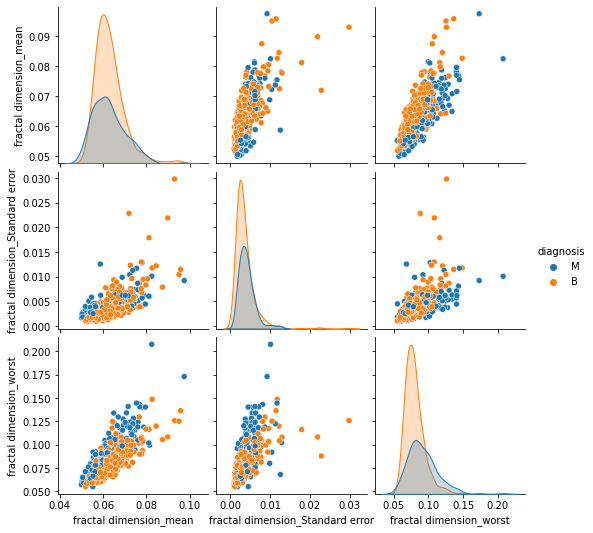

In [18]:
STANDARD_ERROR_INTERVAL = 10
WORST_INTERVAL = 20

for index, nucleus_property_name in enumerate(nucleus_property_names):

    mean_columns = numerical_variables[index]
    standard_error_columns = numerical_variables[index + STANDARD_ERROR_INTERVAL]
    worst_columns = numerical_variables[index + WORST_INTERVAL]
    
    statistic_columns = [mean_columns, standard_error_columns, worst_columns]
    statistic_columns.append(diagnosis_field)
    
    print(nucleus_property_name)
    sns.pairplot(data = breast_cancer_df[statistic_columns], hue = diagnosis_field)
    plt.show()

3D Plot - Distribution & Comparison 

radius


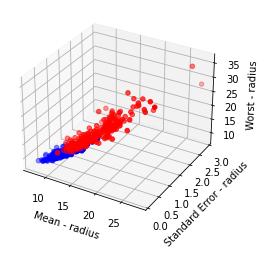

texture


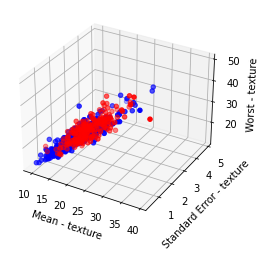

perimeter


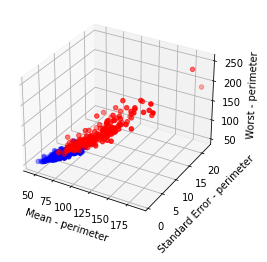

area


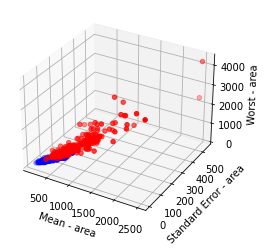

smoothness


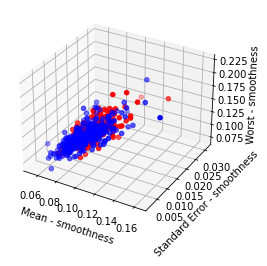

compactness


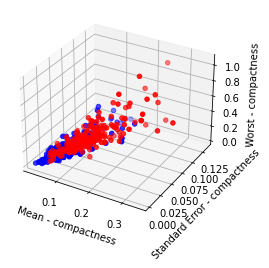

concavity


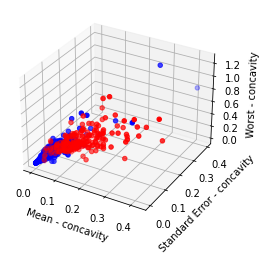

concave points


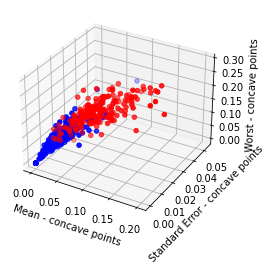

symmetry


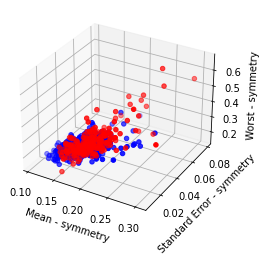

fractal dimension


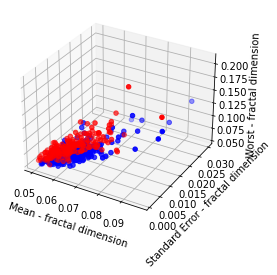

In [19]:
STANDARD_ERROR_INTERVAL = 10
WORST_INTERVAL = 20

for index, nucleus_property_name in enumerate(nucleus_property_names):

    mean_columns = numerical_variables[index]
    standard_error_columns = numerical_variables[index + STANDARD_ERROR_INTERVAL]
    worst_columns = numerical_variables[index + WORST_INTERVAL]
    
    statistic_columns = [mean_columns, standard_error_columns, worst_columns]
    statistic_columns.append(diagnosis_field)

    print(nucleus_property_name)
    
    figure = plt.figure()
    axes = figure.add_subplot(111, projection = '3d')

    color = 0

    x1 = breast_cancer_df[breast_cancer_df[diagnosis_field] == 'M'][mean_columns]
    y1 = breast_cancer_df[breast_cancer_df[diagnosis_field] == 'M'][standard_error_columns]
    z1 = breast_cancer_df[breast_cancer_df[diagnosis_field] == 'M'][worst_columns]

    x2 = breast_cancer_df[breast_cancer_df[diagnosis_field] == 'B'][mean_columns]
    y2 = breast_cancer_df[breast_cancer_df[diagnosis_field] == 'B'][standard_error_columns]
    z2 = breast_cancer_df[breast_cancer_df[diagnosis_field] == 'B'][worst_columns]

    axes.set_xlabel(f'Mean - {nucleus_property_name}')
    axes.set_ylabel(f'Standard Error - {nucleus_property_name}')
    axes.set_zlabel(f'Worst - {nucleus_property_name}')

    axes.scatter(x1, y1, z1, color = 'red')
    axes.scatter(x2, y2, z2, color = 'blue')

    plt.show()

Heatmap - Correlation/ Relationship

mean


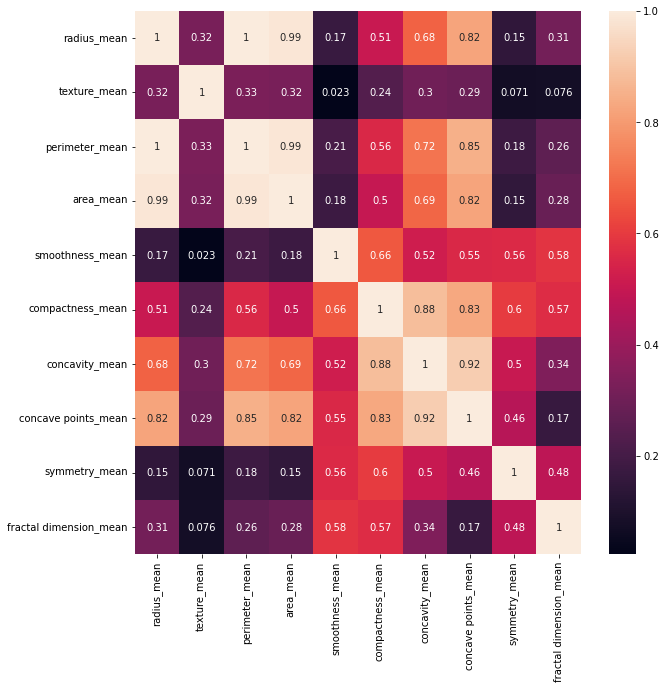

Standard error


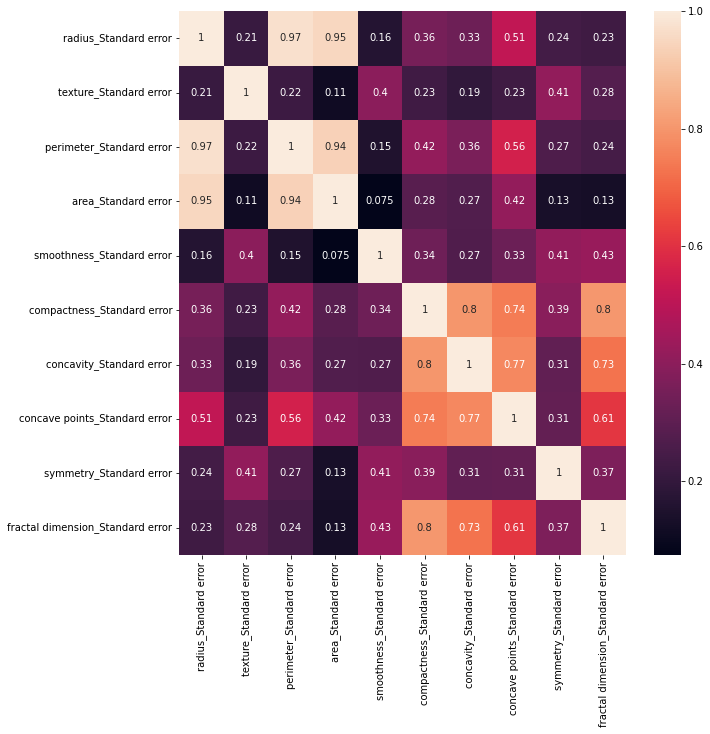

worst


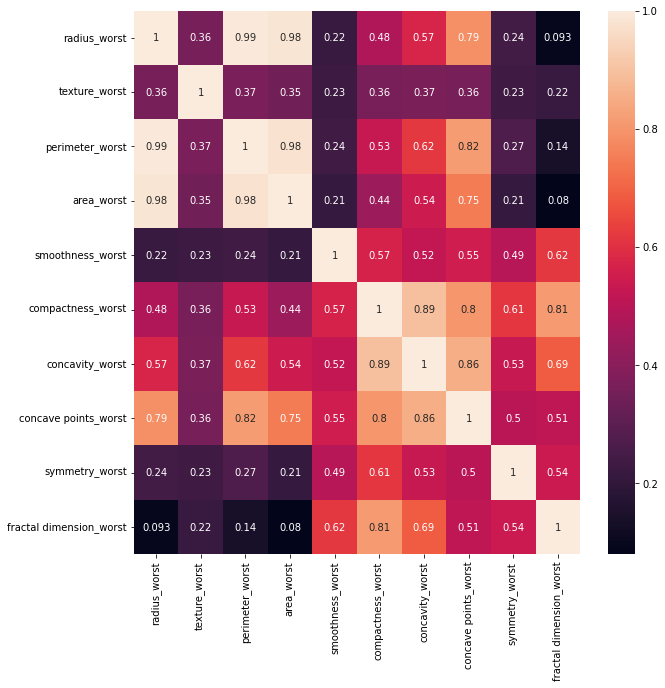

In [20]:
STATISTIC_INTERVAL = 10

for index, statistics_type in enumerate(statistics_types):
    
    statistic_columns = numerical_variables[index * STATISTIC_INTERVAL : (index + 1) * STATISTIC_INTERVAL]
    statistic_columns.append(diagnosis_field)

    print(statistics_types[index])
    
    plt.figure(figsize = (10, 10))
    sns.heatmap(data = np.abs(breast_cancer_df[statistic_columns].corr()), annot = True)
    plt.show()

radius


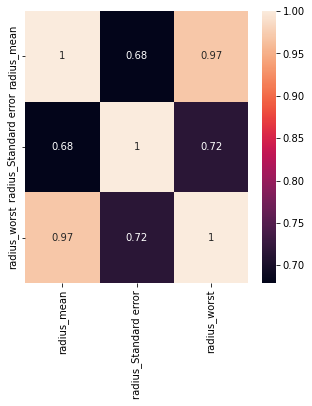

texture


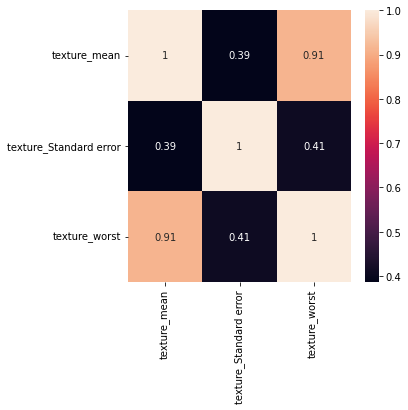

perimeter


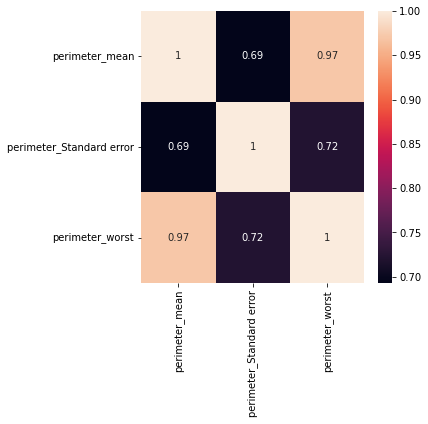

area


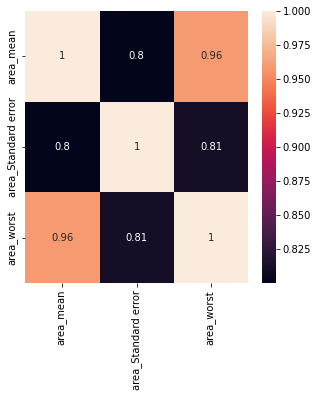

smoothness


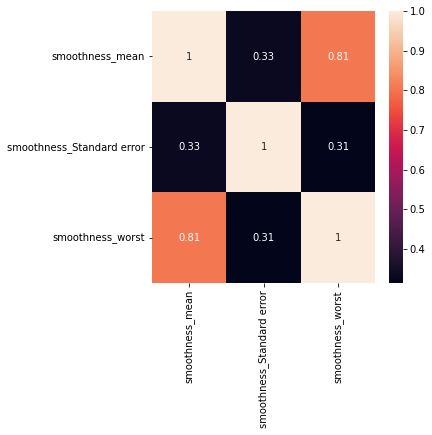

compactness


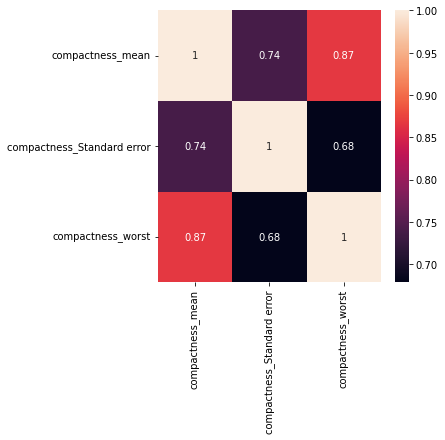

concavity


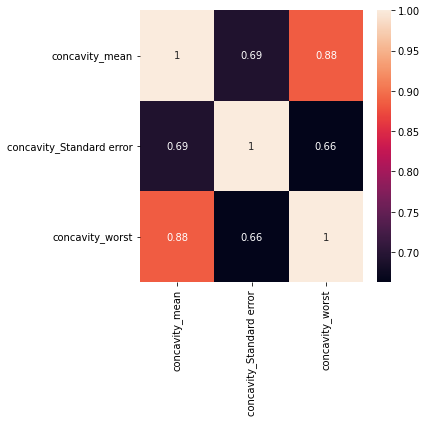

concave points


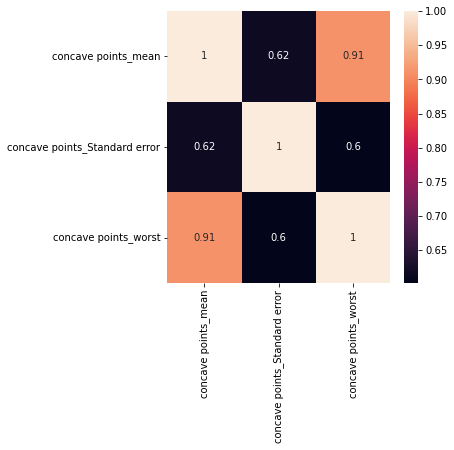

symmetry


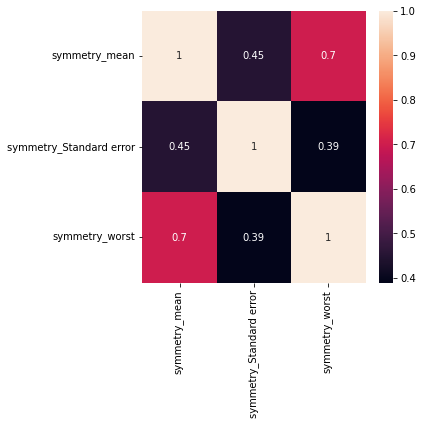

fractal dimension


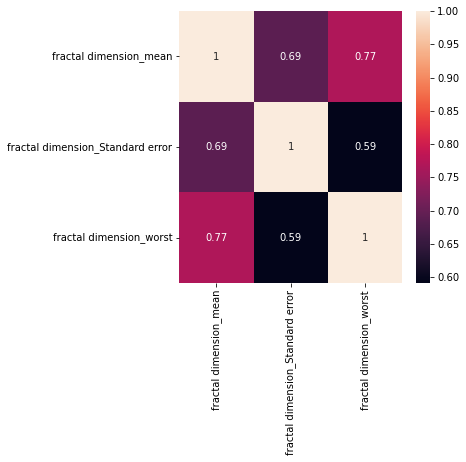

In [21]:
STANDARD_ERROR_INTERVAL = 10
WORST_INTERVAL = 20

for index, nucleus_property_name in enumerate(nucleus_property_names):

    mean_columns = numerical_variables[index]
    standard_error_columns = numerical_variables[index + STANDARD_ERROR_INTERVAL]
    worst_columns = numerical_variables[index + WORST_INTERVAL]
    
    statistic_columns = [mean_columns, standard_error_columns, worst_columns]

    print(nucleus_property_name)
    figure = plt.figure(figsize = (5, 5))
    sns.heatmap(breast_cancer_df[statistic_columns].corr(), annot = True)

    plt.show()

## Data Preprocessing

### ANOVA Feature Selection

Dalam kasus ini, saya akan menggunakan ANOVA untuk melakukan feature selection.

ANOVA adalah salah satu algoritma untuk melakukan analisis variance. Variance adalah nilai informasi yang terdapat pada atribut yang ada. Tujuan dari analisis variance ini adalah agar rata-rata dari dua atau lebih sampel data berasal dari distribusi yang sama. ANOVA menggunakan kalkulasi F-Statistic, yaitu suatu tes statistika yang digunakan untuk menghitung kalkulasi rasio antar variance. ANOVA cocok digunakan pada data-data yang relasinya linear.

ANOVA ini digunakan ketika ada satu variabel numerik dan satu variabel kategorikal. Hasil akhir dari tes ini digunakan untuk menghapus fitur-fitur yang tidak berkorelasi antar variabel kategorikal yang ditentukan. Untuk melakukan pengecekan terhadap prioritas-prioritas fitur-fitur yang ada, kita bisa menggunakan library Sklearn SelectKBest untuk mengecek skor-skor dari masing-masing fitur.

Melakukan Standard Scaler terlebih dahulu

In [101]:
breast_cancer_normalized_data = breast_cancer_df.copy()

standard_scaler = StandardScaler()
breast_cancer_normalized_data[numerical_variables] = standard_scaler.fit_transform(
    breast_cancer_normalized_data[numerical_variables]
)

C:\Users\user\AppData\Local\Temp\ipykernel_15220\3586173424.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([breast_cancer_features[feature_index] for feature_index in range(len(breast_cancer_ANOVA.scores_))])


<BarContainer object of 30 artists>

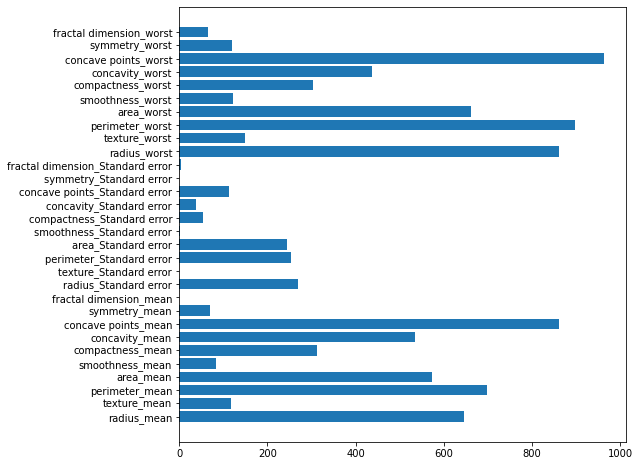

In [106]:
breast_cancer_features = numerical_variables.copy()
breast_cancer_target = categorical_variable

breast_cancer_ANOVA = SelectKBest(score_func = f_classif, k = 20)

feature_importance_ANOVA = breast_cancer_ANOVA.fit_transform(
    breast_cancer_normalized_data[breast_cancer_features],
    breast_cancer_normalized_data[breast_cancer_target]
)

fig, ax = plt.subplots(1, 1)

fig.set_figwidth(8)
fig.set_figheight(8)

ax.set_yticklabels([breast_cancer_features[feature_index] for feature_index in range(len(breast_cancer_ANOVA.scores_))])
ax.set_yticks([feature_index for feature_index in range(len(breast_cancer_ANOVA.scores_))])

ax.barh(
    y = [feature_index for feature_index in range(len(breast_cancer_ANOVA.scores_))],
    width = breast_cancer_ANOVA.scores_
)

Dari hasil plotting di atas, kita bisa melihat bahwa fitur-fitur yang memiliki korelasi tinggi dengan diagnosis adalah sebagai berikut.

* Concave Points Worst
* Area Worst
* Perimeter worst
* Radius worst
* Area Mean
* Concave Points Mean
* Perimeter mean
* Radius mean

Dari hasil field-field yang kita pilih, concave, area, perimeter, dan radius memiliki peran esensial dalam menentukan breast cancer ganas atau jinak. Standard Error tidak menentukan apakah sel tersebut adalah kanker ganas atau jinak. Maka dari itu, kita bisa mengambil field-field yang paling berperan dari hasil ANOVA di atas.

In [23]:
selected_features = [concave_points, area_field, perimeter_field, radius_field]
selected_statistics_types = [worst_field, mean_field]

selected_dataset_column_names = []

for nucleus_index, statistics_type in enumerate(selected_statistics_types):
    for nucleus_property_index, nucleus_property in enumerate(selected_features):
        selected_dataset_column_names.append(f"{nucleus_property}_{statistics_type}")

print(selected_dataset_column_names)

['concave points_worst', 'area_worst', 'perimeter_worst', 'radius_worst', 'concave points_mean', 'area_mean', 'perimeter_mean', 'radius_mean']


In [24]:
breast_cancer_selected_features_df = breast_cancer_df[selected_dataset_column_names]
breast_cancer_selected_features_df

concave points_worst  area_worst  perimeter_worst  radius_worst  \
0                  0.2654      2019.0           184.60        25.380   
1                  0.1860      1956.0           158.80        24.990   
2                  0.2430      1709.0           152.50        23.570   
3                  0.2575       567.7            98.87        14.910   
4                  0.1625      1575.0           152.20        22.540   
..                    ...         ...              ...           ...   
564                0.2216      2027.0           166.10        25.450   
565                0.1628      1731.0           155.00        23.690   
566                0.1418      1124.0           126.70        18.980   
567                0.2650      1821.0           184.60        25.740   
568                0.0000       268.6            59.16         9.456   

     concave points_mean  area_mean  perimeter_mean  radius_mean  
0                0.14710     1001.0          122.80        17.99  
1                0.07017     1326.0          132.90        20.57  
2                0.12790     1203.0          130.00        19.69  
3                0.10520      386.1           77.58        11.42  
4                0.10430     1297.0          135.10        20.29  
..                   ...        ...             ...          ...  
564              0.13890     1479.0          142.00        21.56  
565              0.09791     1261.0          131.20        20.13  
566              0.05302      858.1          108.30        16.60  
567              0.15200     1265.0          140.10        20.60  
568              0.00000      181.0           47.92         7.76  

[569 rows x 8 columns]

### Random Forest Feature Selection

Mari kita mencoba untuk melakukan feature selection dengan Random Forest Feature Selection.

In [113]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(
    breast_cancer_normalized_data[numerical_variables],
    breast_cancer_normalized_data[target_variables])

RandomForestClassifier()

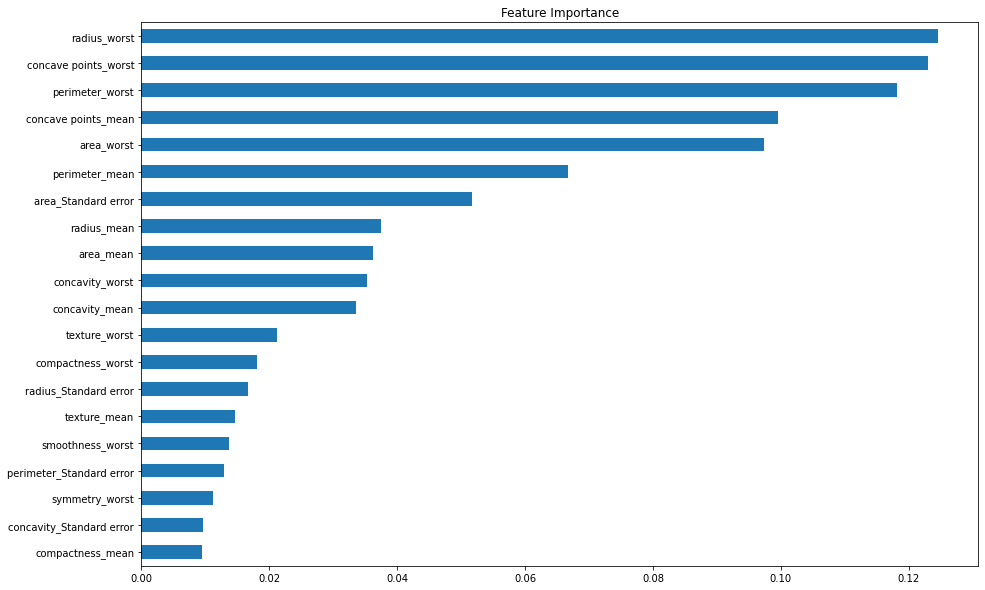

In [114]:
X_ = np.array(numerical_variables)
importance_scores = random_forest_classifier.feature_importances_
indices = np.argsort(importance_scores)

plt.figure(figsize=(15, 10))
feature_importances = pd.Series(random_forest_classifier.feature_importances_, index = X_)
feature_importances.nlargest(20).sort_values(ascending=True).plot(kind='barh')
plt.title('Feature Importance')
plt.show()

### Variance Inflation Factor

Di sini, kita akan menggunakan nilai VIF. VIF menentukan kekuatan korelasi antara semua fitur-fitur independen yang ada pada dataset tersebut. Ia diprediksikan dengan mengambil variabel dan melakukan regresi dengan variabel tersebut satu per satu. Dari hasil skor VIF, kita bisa melihat seberapa baiknya variabel tersebut berkorelasi dengan variabel lainnya.

Perhatikan gambar pada correlation plot pada bagian Correlation Plot - Correlation/ Relationship. Kita bisa melihat bahwa ada beberapa variabel independen yang memiliki korelasi tinggi antar variabel-variabel tersebut. Ini menunjukkan bahwa potensi pengaruh perubahan nilai pada variabel jika satu variabel lainnya naik menjadi lebih drastis. Dalam kasus ini, model akan mengalami bias. Hal ini merupakan faktor yang harus dihindari saat melakukan regresi.

Nilai VIF memiliki rentang sebagai berikut.

* Jika nilai VIF adalah 1, maka ia tidak memiliki korelasi apapun
* Jika nilai VIF berada di atas 5 atau 10 (tergantung kondisi), maka ia memiliki korelasi yang tinggi antar variabel independen lainnya.

Rumus dari VIF adalah sebagai berikut.

$\mathrm{VIF = 1 / (1 - R ^ 2)}$

Dari rumus di atas, R^2 memiliki arti yang sama pada paragraf-paragraf di atas, yaitu seberapa baiknya variabel independen berkorelasi kepada variabel independen lainnya.

In [25]:
breast_cancer_values = breast_cancer_df[selected_dataset_column_names].values

print(breast_cancer_values)
print(breast_cancer_values.T)

[[2.654e-01 2.019e+03 1.846e+02 ... 1.001e+03 1.228e+02 1.799e+01]
 [1.860e-01 1.956e+03 1.588e+02 ... 1.326e+03 1.329e+02 2.057e+01]
 [2.430e-01 1.709e+03 1.525e+02 ... 1.203e+03 1.300e+02 1.969e+01]
 ...
 [1.418e-01 1.124e+03 1.267e+02 ... 8.581e+02 1.083e+02 1.660e+01]
 [2.650e-01 1.821e+03 1.846e+02 ... 1.265e+03 1.401e+02 2.060e+01]
 [0.000e+00 2.686e+02 5.916e+01 ... 1.810e+02 4.792e+01 7.760e+00]]
[[2.654e-01 1.860e-01 2.430e-01 ... 1.418e-01 2.650e-01 0.000e+00]
 [2.019e+03 1.956e+03 1.709e+03 ... 1.124e+03 1.821e+03 2.686e+02]
 [1.846e+02 1.588e+02 1.525e+02 ... 1.267e+02 1.846e+02 5.916e+01]
 ...
 [1.001e+03 1.326e+03 1.203e+03 ... 8.581e+02 1.265e+03 1.810e+02]
 [1.228e+02 1.329e+02 1.300e+02 ... 1.083e+02 1.401e+02 4.792e+01]
 [1.799e+01 2.057e+01 1.969e+01 ... 1.660e+01 2.060e+01 7.760e+00]]


In [26]:
vif = [variance_inflation_factor(breast_cancer_values, i) for i in range(len(breast_cancer_values.T))]
pd.DataFrame({'VIF': vif[0:]}, index = selected_dataset_column_names).T

concave points_worst  area_worst  perimeter_worst  radius_worst  \
VIF             34.496375  544.151036      2258.504864   4661.533659   

     concave points_mean   area_mean  perimeter_mean   radius_mean  
VIF            42.241595  512.020665    19430.975989  21052.774312

Dari hasil VIF di atas, kita bisa mengecek bahwa hasil tersebut berada di atas 10. Hal ini tentu akan sangat mempengaruhi naik/ turun antara satu variabel dengan variabel lainnya.

### Removing Outlier

**Z-Score**

Secara singkat, Z Score adalah suatu teknik statistika untuk melihat seberapa dekatnya satu angka pada fitur terhadap rata-rata dari suatu kumpulan angka-angka pada fitur.

Untuk lebih jelasnya, perhatikan contoh gambar berikut.

![Gambar pada Z-Score](https://www.investopedia.com/thmb/cTLmW4BN4TGe8UizdDPTi1ld-i8=/1431x1073/smart/filters:no_upscale()/Z-dc7881981d5b4ab5a8765f2a293c9552.png)

Sumber: https://www.investopedia.com/thmb/cTLmW4BN4TGe8UizdDPTi1ld-i8=/1431x1073/smart/filters:no_upscale()/Z-dc7881981d5b4ab5a8765f2a293c9552.png

Dari gambar di atas, perhatikan lingkaran merah tersebut. Di atas, ia menjelaskan bahwa semakin besar nilai Z score, baik secara negatif atau positif, data tersebut akan semakin menjauh dari mean. Nilai z score yang tinggi juga menunjukkan outlier, karena nilai outlier akan tentu jauh berbeda nilainya dari nilai rata-rata.

Teknik Z Score ini lebih ramah dibandingkan dengan IQR Method. Hal ini disebabkan karena kita bisa bebas mengatur parameter Z Score yang ingin kita pertahankan datanya.

In [27]:
def threshold(z_score_data, original_data, min_threshold, max_threshold, increment_threshold):
    for z_score in np.arange(min_threshold, max_threshold, increment_threshold):
        data = original_data.copy()
        data = data[(z_score_data < z_score).all(axis = 1)]
        loss = (original_data.shape[0] - data.shape[0]) / original_data.shape[0] * 100
        print(f'With threshold {np.round(z_score, 1)}, data loss is: {np.round(loss, 2)}%')

In [28]:
z_score_columns = selected_dataset_column_names.copy()

z_score = np.abs(zscore(breast_cancer_df[z_score_columns]))
threshold(z_score, breast_cancer_df[z_score_columns], 1, 8, 0.2)

With threshold 1.0, data loss is: 48.51%
With threshold 1.2, data loss is: 38.14%
With threshold 1.4, data loss is: 25.83%
With threshold 1.6, data loss is: 18.8%
With threshold 1.8, data loss is: 13.36%
With threshold 2.0, data loss is: 8.96%
With threshold 2.2, data loss is: 6.15%
With threshold 2.4, data loss is: 4.92%
With threshold 2.6, data loss is: 4.39%
With threshold 2.8, data loss is: 3.16%
With threshold 3.0, data loss is: 2.46%
With threshold 3.2, data loss is: 2.28%
With threshold 3.4, data loss is: 1.93%
With threshold 3.6, data loss is: 1.41%
With threshold 3.8, data loss is: 1.23%
With threshold 4.0, data loss is: 0.88%
With threshold 4.2, data loss is: 0.7%
With threshold 4.4, data loss is: 0.7%
With threshold 4.6, data loss is: 0.35%
With threshold 4.8, data loss is: 0.35%
With threshold 5.0, data loss is: 0.35%
With threshold 5.2, data loss is: 0.35%
With threshold 5.4, data loss is: 0.18%
With threshold 5.6, data loss is: 0.18%
With threshold 5.8, data loss is: 0.18

Hapus outlier dari threshold yang diberikan.

Perlu diperhatikan, jumlah data yang ingin kita hapus harus dilihat juga dari jumlah data yang kita punya. Jangan menggunakan threshold yang kecil jika data yang kita punya sangat sedikit.

In [29]:
breast_cancer_no_outlier_df = breast_cancer_df[(z_score < 2.8).all(axis = 1)]
print("Before Clean Outlier:", breast_cancer_df.shape[0])
print("After Clean Outlier:", breast_cancer_no_outlier_df.shape[0])

Before Clean Outlier: 569
After Clean Outlier: 551


Menggunakan Box Plotting untuk melihat outlier sekarang.

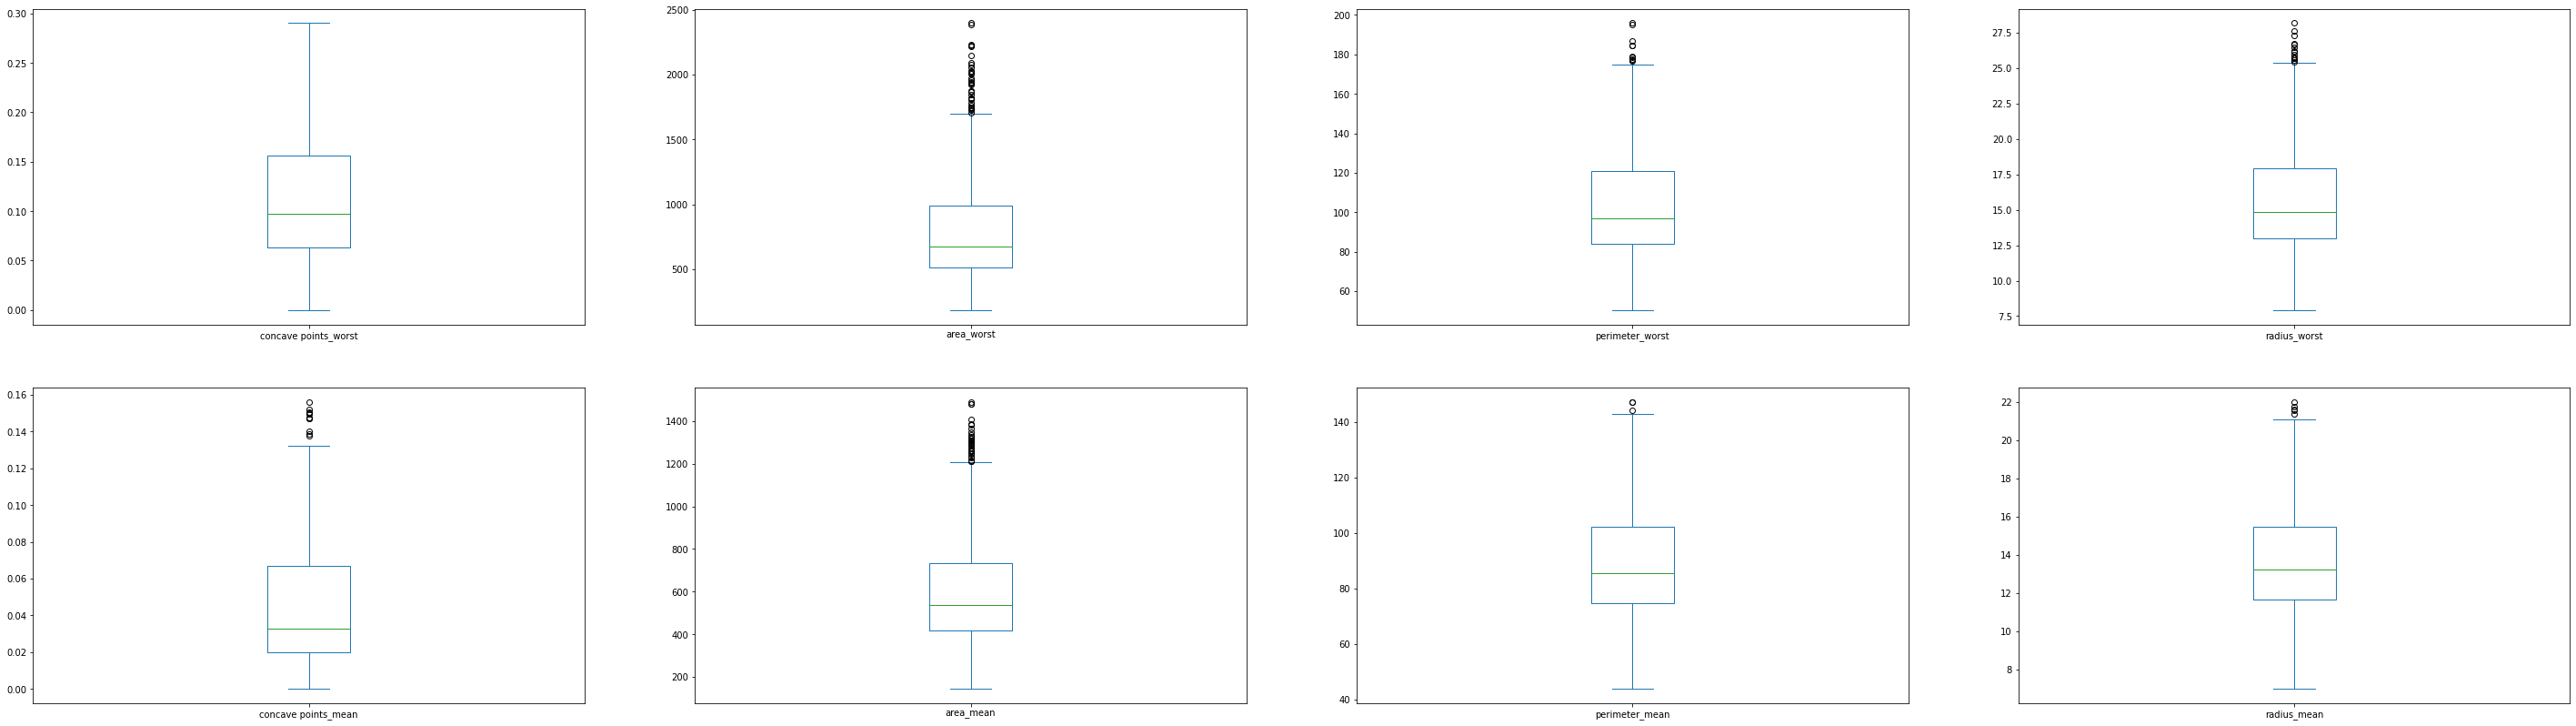

In [30]:
breast_cancer_no_outlier_df[z_score_columns].plot(kind = 'box', subplots = True, layout = (8, 4), figsize = (50, 60))
plt.show()

### Label Encoding

Label encoder bertujuan agar ia bisa melakukan konversi non numerik menjadi numerikal. Hal ini disebabkan karena machine learning hanya bisa melakukan pemrosesan data dengan angka.

Perlu diingat, label encoder digunakan ketika data tersebut menunjukkan hubungan tingkatan. Di sini, kita melihat bahwa malignant lebih kecil tingkat keparahannya daripada benign. Maka dari itu, kita bisa mengubahnya dengan label encoder.

In [31]:
breast_cancer_labeled = breast_cancer_no_outlier_df.copy()

In [32]:
label_encoder = LabelEncoder()
breast_cancer_labeled[target_variables] = label_encoder.fit_transform(breast_cancer_labeled[target_variables])

### Train Test Split

Kita akan melakukan pembagian dataset terlebih dahulu. Hal ini bertujuan agar kita bisa mengukur accuracy dengan data yang belum pernah dipelajari.

In [33]:
breast_cancer_datasplit = breast_cancer_labeled.copy()

In [34]:
x_train, x_test, y_train, y_test = train_test_split(
    breast_cancer_labeled[selected_dataset_column_names],
    breast_cancer_labeled[target_variables],
    test_size = 0.1,
    random_state = 100
)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(495, 8)
(56, 8)
(495,)
(56,)


Melihat Persebaran distribusi data pada hasil train dan test data.

<AxesSubplot:xlabel='radius_mean', ylabel='Density'>

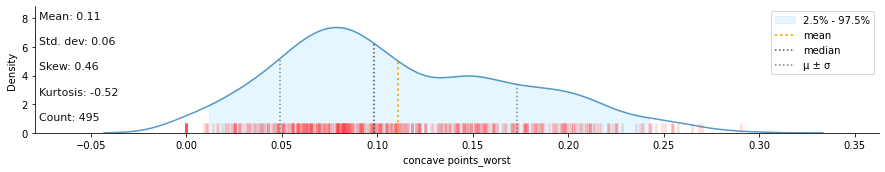

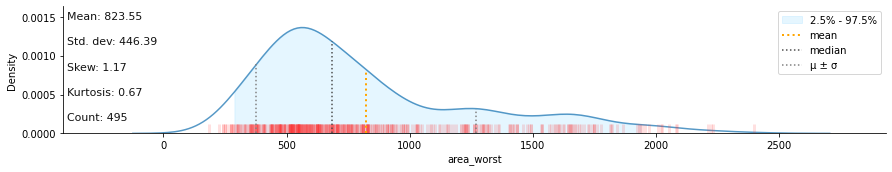

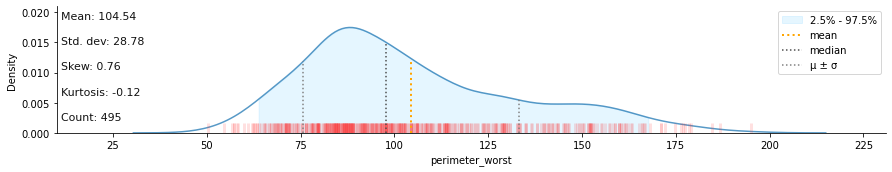

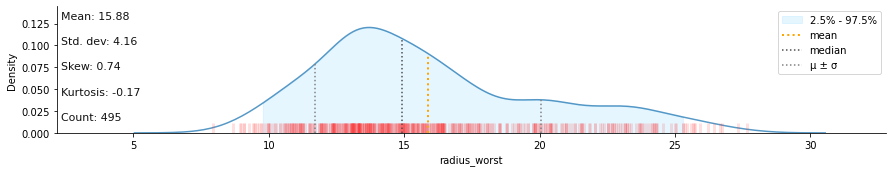

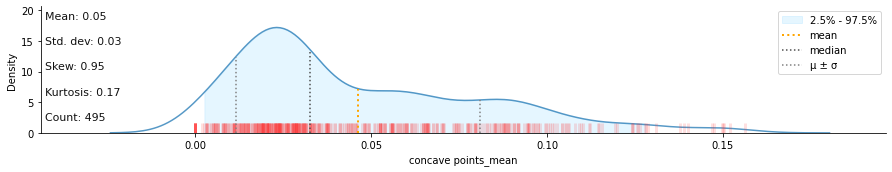

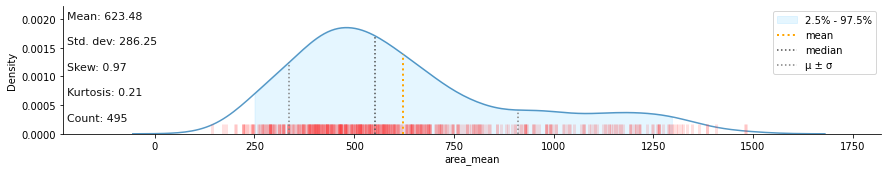

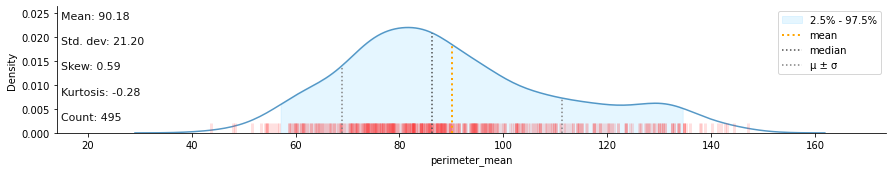

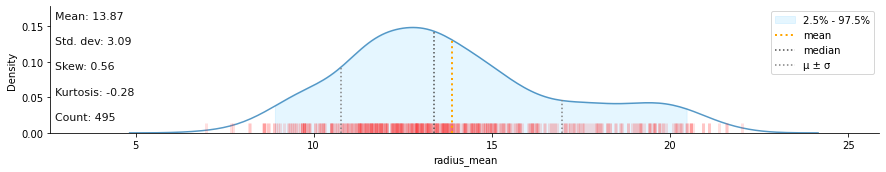

In [35]:
klib.dist_plot(x_train)

<AxesSubplot:xlabel='radius_mean', ylabel='Density'>

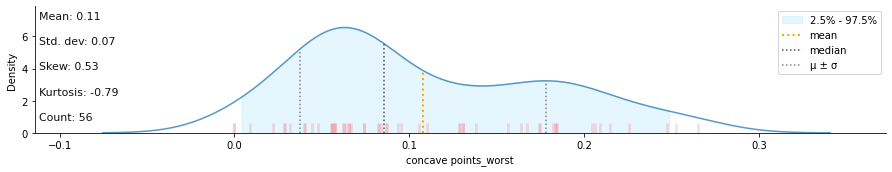

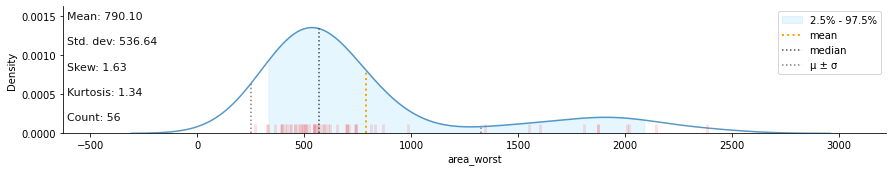

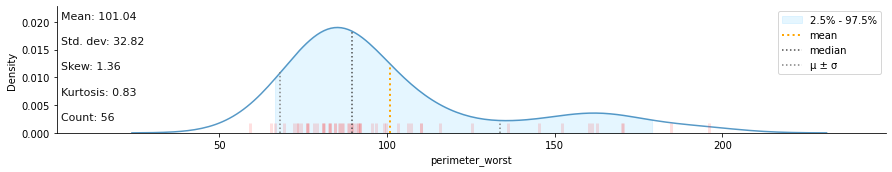

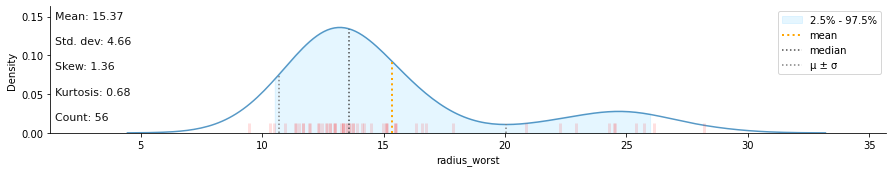

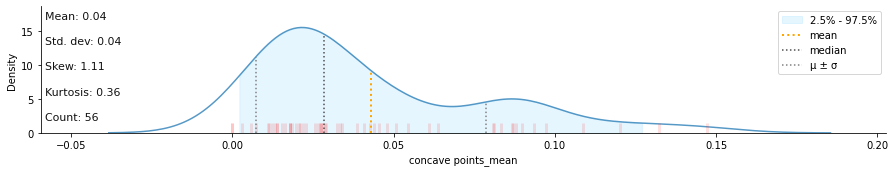

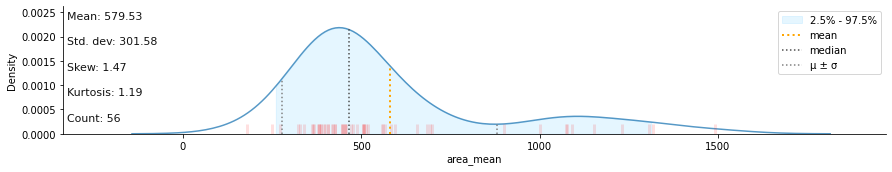

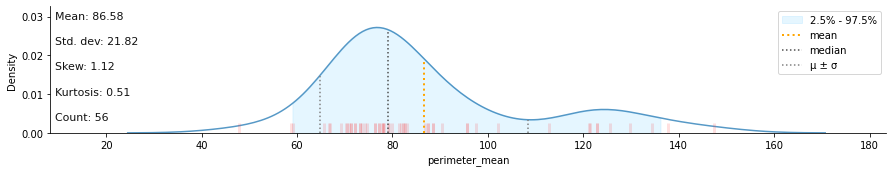

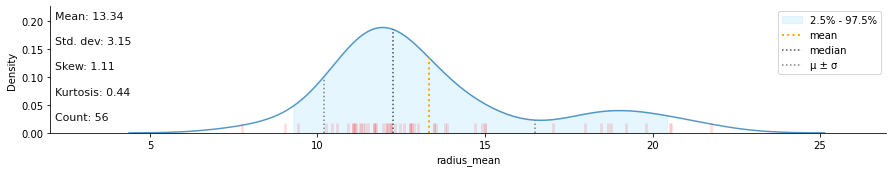

In [36]:
klib.dist_plot(x_test)

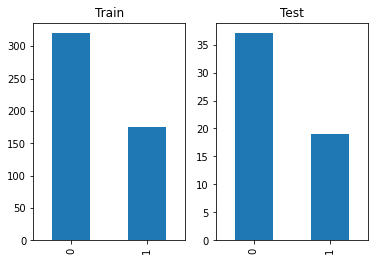

In [37]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)

y_train.value_counts().plot(kind = 'bar', ax = axes[0], title = "Train")

y_test.value_counts().plot(kind = 'bar', ax = axes[1], title = "Test")

plt.show()

### Feature Extraction

Sebelum kita melakukan feature extraction, mari melakukan correlation plot sekali lagi.

Saat ini, kita hanya memiliki 8 fitur saja. Maka dari itu, kita bisa langsung melakukan plotting langsung correlation menggunakan fitur-fitur yang ada.

In [38]:
breast_cancer_extracted_df = breast_cancer_datasplit[selected_dataset_column_names]

<AxesSubplot:>

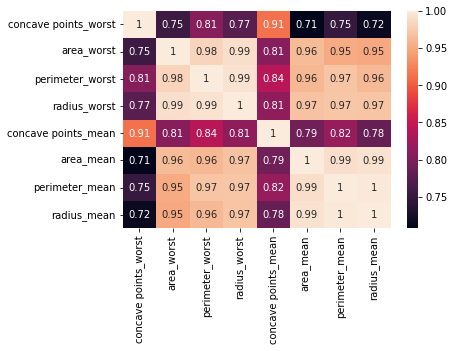

In [39]:
sns.heatmap(breast_cancer_extracted_df.corr(), annot = True)

PCA adalah singkatan dari Principal Component Analysis. Principal component analysis bertujuan untuk mentransformasikan data dengan mengubah dimensi fitur-fitur yang ada menjadi dimensi yang lebih kecil lagi. Ia mereduksi dimensi dengan memiliki variance maksimal, yaitu rata-rata jarak kuadrat dari poin-poin yang telah diproyeksi dengan garis lurus ke titik asal. Inilah yang dimaksud dengan Principal Components.

Saat teknik ini diterapkan, hanya komponen utama yang akan digunakan. Inilah yang dimaksud dengan Principal Component (PC). Jika data-data pada fitur berkorelasi linear, maka kita hanya menggunakan PC pertama saja. PC kedua dan seterusnya merupakan sisa informasi-informasi yang tidak didapatkan pada data pertama. Dalam sklearn. kita bisa menggunakan atribut score untuk melihat nilai PCA.

Dari plotting di atas, terdapat banyak sekali variabel-variabel yang berkolinearitas tinggi. Hal ini selaras dengan nilai VIF pada tahap sebelumnya. Maka dari itu, ini menjadi peluang untuk melakukan salah satu teknik dimensionality reduction, yaitu PCA.

Di sini, kita akan coba untuk melakukan teknik PCA sebanyak 2 kali, yaitu sebagai berikut.

* Area, Perimeter, dan Radius (worst dan mean)
* Concave Points (worst dan mean)

In [40]:
pca_features_areas = selected_dataset_column_names.copy()
pca_features_areas.remove('concave points_worst')
pca_features_areas.remove('concave points_mean')

pca_features_concave_point = []
pca_features_concave_point.append('concave points_worst')
pca_features_concave_point.append('concave points_mean')

print(pca_features_areas)
print(pca_features_concave_point)

['area_worst', 'perimeter_worst', 'radius_worst', 'area_mean', 'perimeter_mean', 'radius_mean']
['concave points_worst', 'concave points_mean']


In [41]:
pca_model_area = PCA(n_components=1)
pca_model_concave_point = PCA(n_components=1)

x_train_pca = x_train.copy()
x_test_pca = x_test.copy()

x_train_pca[pca_area_field] = pca_model_area.fit_transform(x_train[pca_features_areas]).flatten()
x_test_pca[pca_area_field] = pca_model_area.transform(x_test[pca_features_areas]).flatten()

x_train_pca[pca_concave_field] = pca_model_concave_point.fit_transform(
    x_train[pca_features_concave_point]
).flatten()

x_test_pca[pca_concave_field] = pca_model_concave_point.transform(
    x_test[pca_features_concave_point],
).flatten()

print(f"Area Variance Ratio: {np.round(pca_model_area.explained_variance_ratio_, 2)}")
print(f"Concave Variance Ratio: {np.round(pca_model_concave_point.explained_variance_ratio_, 2)}")

Area Variance Ratio: [0.98]
Concave Variance Ratio: [0.97]


Melakukan drop untuk semua field selain hasil dari PCA

In [42]:
x_train_pca = x_train_pca[[pca_area_field, pca_concave_field]]
x_train_pca

Area   Concave
178 -234.105962 -0.110725
403 -267.533084 -0.034531
512  -17.555415  0.099629
222 -546.026391 -0.061573
81  -231.723765  0.063796
..          ...       ...
445 -359.880442  0.006382
283  273.718859  0.075656
387  -80.669458 -0.075747
436 -227.591800 -0.053615
481   -5.151564 -0.038139

[495 rows x 2 columns]

In [43]:
x_test_pca = x_test_pca[[pca_area_field, pca_concave_field]]
x_test_pca

Area   Concave
397  -258.589979 -0.027353
535  1200.954948  0.132001
522  -454.716815 -0.092121
187  -364.770035 -0.007583
529  -327.284961 -0.041378
38    -65.417804 -0.080524
85    901.958718  0.066508
557  -606.785118 -0.119763
296  -504.885605 -0.085142
135  -206.811726 -0.024735
130  -325.317793 -0.033981
226  -520.388515 -0.074667
285  -291.970337 -0.110649
379  -406.997873  0.132814
57    155.274726  0.080265
510  -402.092147 -0.014206
74   -261.752094 -0.032689
398  -408.486241 -0.067358
102  -322.017173 -0.045894
153  -453.908073 -0.062790
19   -125.615538  0.016356
568  -708.039128 -0.119763
49   -138.959441  0.009235
357  -125.314641 -0.060924
0    1215.371749  0.183644
537  -400.534227  0.016940
218  1328.399871  0.081711
430    42.079352  0.144274
268  -251.131004 -0.061181
233  1259.971709  0.057396
394  -318.566387 -0.048823
73    -30.051529  0.026091
349  -382.680792 -0.069310
289  -430.571994 -0.054819
428  -471.076038 -0.077643
443  -539.141019 -0.094929
179  -275.736947 -0.078308
507  -487.165634 -0.015741
390  -525.457099 -0.051440
39   -104.311665  0.104983
56   1401.437138  0.107034
312  -237.325931 -0.033582
142  -392.392557 -0.054537
68   -622.915636  0.055174
413    74.747235  0.013849
272  1785.887899  0.093892
251  -382.396839 -0.052303
5    -147.463349  0.071905
8    -126.318903  0.105995
271  -436.404202 -0.029617
48   -297.341646 -0.049059
32    588.649373  0.099847
480  -323.895627 -0.062390
310  -398.226683 -0.063729
121   857.103982  0.068716
337  1139.386027  0.089540

### Scaling

Dalam hal ini, saya akan mencoba untuk melakukan normalisasi hasil yang ada. Tujuan dari normalisasi ini adalah agar kita bisa melakukan pemerataan data.

Di sini, saya akan menggunakan MinMaxScaler. MinMaxScaler bertujuan untuk melakukan pengurangan range pada data kita. Setelah menerapkan MinMaxScaler, range pada data kita berkisar di antara 0 - 1, baik dalam sumbu x ataupun y.

In [44]:
min_max_scaler = MinMaxScaler()

x_train_scaled = x_train_pca.copy()
x_test_scaled = x_test_pca.copy()

x_train_scaled[[pca_area_field, pca_concave_field]] = min_max_scaler.fit_transform(x_train_scaled)
x_test_scaled[[pca_area_field, pca_concave_field]] = min_max_scaler.transform(x_test_scaled)

Melakukan data visualization setelah teknik-teknik data preprocessing di atas.

In [45]:
pairplot_train_df = pd.concat([x_train_scaled, y_train], axis = 1, copy = True)
pairplot_test_df = pd.concat([x_test_scaled, y_test], axis = 1, copy = True)

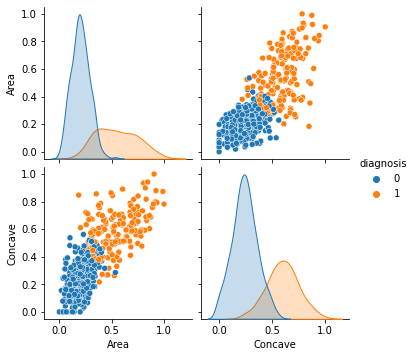

In [46]:
sns.pairplot(data = pairplot_train_df, hue = diagnosis_field)

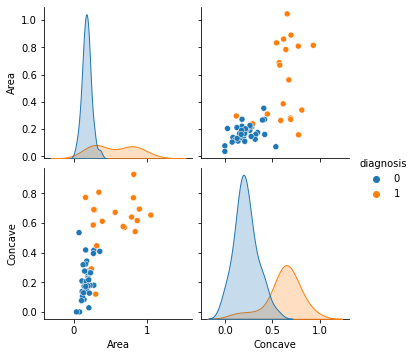

In [47]:
sns.pairplot(data = pairplot_test_df, hue = diagnosis_field)

## Data Modelling

Apabila kita cek dari hasil pairplot di atas, dapat dikatakan bahwa ia dapat dipisahkan dengan garis linear. Maka dari itu, kita akan mencoba untuk menggunakan eksplorasi model linear untuk mendapatkan prediksi yang sesuai.

Kita akan mencoba menggunakan model-model berikut:

- Linear Classification
- SVC
- Logistic Regression

Tidak hanya itu, pada proyek ini, saya akan melakukan hyperparameter tuning secara otomatis. Dengan hyperparameter tuning secara otomatis, kita bisa lebih fokus untuk memilih model dan preprocessing yang tepat. Hal ini tentu akan lebih menghemat waktu untuk mendapatkan hyperparameter yang tepat.

Terdapat dua teknik hyperparameter tuning secara otomatis, yaitu Grid Search dan Random Search. Dalam proyek ini, saya akan menggunakan Grid Search saja. Keuntungan menggunakan grid search adalah karena ia melihat kombinasi hyperparameter yang terbaik dari parameter-parameter dan nilai-nilai parameter yang saya tentukan. Jika menggunakan random search, maka kecepatan menentukan nilai parameter bisa lebih cepat, namun tidak seakurat Grid Search. Oleh karena itu, di sini, saya akan menggunakan Grid Search.

Inisialisasi Model

In [59]:
linear_classification_model = SGDClassifier(random_state = 100)
svc_model = svm.LinearSVC(random_state = 100)
logistic_regression_model = LogisticRegression(random_state = 100)

models = [linear_classification_model, svc_model, logistic_regression_model]
model_names = ['Linear Classification', 'Support Vector Classifier', 'Logistic Regression']

Inisialisasi parameter-parameter model dan nilainya

In [60]:
linear_classification_parameters = {
    'max_iter': [100, 400, 700, 1000],
    'tol': [1e-3, 1e-5, 1e-6, 1e-8, 1e-10],\
    'fit_intercept': [True, False],
    'alpha': [1e-4, 1e-5, 1e-6]
}

svc_parameters = {
    'max_iter': [100, 400, 700, 1000],
    'tol': [1e-3, 1e-5, 1e-6, 1e-8, 1e-10],
    'fit_intercept': [True, False],
}

logistic_regression_parameters = {
    'tol': [1e-3, 1e-5, 1e-6, 1e-8, 1e-10],
    'C': [1, 1.2, 1.6, 2, 2.4, 2.8],
    'fit_intercept': [True, False]
}

grid_search_parameters = [linear_classification_parameters, svc_parameters, logistic_regression_parameters]

Melakukan running pada grid search, untuk melihat parameter-parameter terbaik dari nilai-nilai yang diberikan.

In [61]:
for index, parameter in enumerate(grid_search_parameters):
    grid_search = GridSearchCV(models[index], parameter)
    grid_search.fit(x_train_scaled, y_train)
    print(f"{model_names[index]}:")
    print(grid_search.best_params_)
    print()

Linear Classification:
{'alpha': 0.0001, 'fit_intercept': True, 'max_iter': 100, 'tol': 0.001}

Support Vector Classifier:
{'fit_intercept': True, 'max_iter': 100, 'tol': 0.001}

Logistic Regression:
{'C': 2.8, 'fit_intercept': True, 'tol': 0.001}



### Linear Classification dengan Schocastic Gradient Descent

In [62]:
linear_classification_model = SGDClassifier(
    alpha = 0.0001,
    fit_intercept = True,
    max_iter = 100,
    tol = 0.001,
    random_state = 100
)

linear_classification_model.fit(
    x_train_scaled,
    y_train
)

SGDClassifier(max_iter=100, random_state=100)

Melakukan visualisasi plotting dari Linear Classification

In [63]:
print(f"Intercept: {linear_classification_model.intercept_}")
print(f"Coefficients: {linear_classification_model.coef_}")

Intercept: [-12.24530768]
Coefficients: [[16.78508311 14.74573932]]


Melakukan prediksi machine learning

In [64]:
breast_cancer_linear_predictions = linear_classification_model.predict(x_test_pca)
breast_cancer_linear_predictions

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1])

### SVC (Scalable Vector Classifier)

In [65]:
svc_model = svm.LinearSVC(
    fit_intercept = True,
    max_iter = 100,
    tol = 0.001,
    random_state = 100 
)

svc_model.fit(
    x_train_scaled,
    y_train
)

LinearSVC(max_iter=100, random_state=100, tol=0.001)

Melakukan prediksi dari SVC

In [66]:
breast_cancer_svc_predictions = svc_model.predict(x_test_pca)
breast_cancer_svc_predictions

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1])

### Logistic Regression

In [67]:
logistic_regression_model = LogisticRegression(
    C = 2.8,
    fit_intercept = True,
    tol = 0.001,
    random_state = 100
)

logistic_regression_model.fit(
    x_train_scaled,
    y_train
)

LogisticRegression(C=2.8, random_state=100, tol=0.001)

Melakukan prediksi dari logistic regression

In [68]:
breast_cancer_logistic_predictions = logistic_regression_model.predict(x_test_pca)
breast_cancer_logistic_predictions

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1])

## Evaluation

Pada tahap ini, saya akan melakukan evaluasi machine learning dari berbagai model-model di atas.

Tujuan dari evaluasi adalah agar kita bisa mengetahui apakah model-model di atas memiliki kualitas yang bagus untuk memprediksi machine learning.

Dalam kasus ini, terdapat beberapa metrik yang digunakan, yaitu sebagai berikut.

* Classification Report (Accuracy, F1-Score, Precision, Recall, dan Support)
* Confusion Matrix
* Loss (RMSE, MSE, dan MAE)

Mendapatkan semua hasil prediksi.

In [72]:
breast_cancer_predictions = [
    breast_cancer_linear_predictions,
    breast_cancer_svc_predictions,
    breast_cancer_logistic_predictions
]

Classification Report

In [83]:
for index, prediction in enumerate(breast_cancer_predictions):
    print(f"{model_names[index]}:")
    print(classification_report(
        y_pred = prediction,
        y_true = y_test,
    ))

Linear Classification:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90        37
           1       0.92      0.63      0.75        19

    accuracy                           0.86        56
   macro avg       0.88      0.80      0.82        56
weighted avg       0.87      0.86      0.85        56

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90        37
           1       0.92      0.63      0.75        19

    accuracy                           0.86        56
   macro avg       0.88      0.80      0.82        56
weighted avg       0.87      0.86      0.85        56

Logistic Regression:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90        37
           1       0.92      0.63      0.75        19

    accuracy                           0.86        56
   macro avg       0.88      0.80      0.82        56
wei

Confusion Matrix

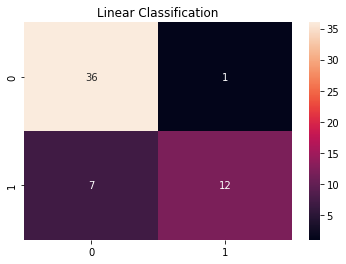

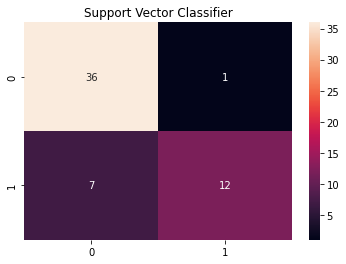

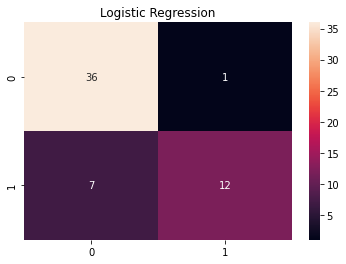

In [91]:
for index, prediction in enumerate(breast_cancer_predictions):
    breast_cancer_confusion_matrix = confusion_matrix(
        y_pred = prediction,
        y_true = y_test
    )
    plt.title(model_names[index])
    sns.heatmap(breast_cancer_confusion_matrix, annot = True)

    plt.show()


Loss

In [82]:
for index, prediction in enumerate(breast_cancer_predictions):
    print(f"{model_names[index]}:")

    mean_absolute_error_result = mean_absolute_error(
        y_true = y_test,
        y_pred = prediction
    )

    mean_squared_error_result = mean_squared_error(
        y_true = y_test,
        y_pred = prediction
    )

    root_mean_squared_error_result = np.sqrt(mean_squared_error(
        y_true = y_test,
        y_pred = prediction
    ))

    print(f"Mean Absolute Error: {mean_absolute_error_result}")
    print(f"Mean Squared Error: {mean_squared_error_result}")
    print(f"Root Mean Squared Error: {root_mean_squared_error_result}")
    print()

Linear Classification:
Mean Absolute Error: 0.14285714285714285
Mean Squared Error: 0.14285714285714285
Root Mean Squared Error: 0.3779644730092272

Support Vector Classifier:
Mean Absolute Error: 0.14285714285714285
Mean Squared Error: 0.14285714285714285
Root Mean Squared Error: 0.3779644730092272

Logistic Regression:
Mean Absolute Error: 0.14285714285714285
Mean Squared Error: 0.14285714285714285
Root Mean Squared Error: 0.3779644730092272

